# COVID-19과 우리나라의 대응력

# 1) 데이터 구하기

# 2) 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
confirmed = pd.read_csv(
    '../data/time_series_covid19_confirmed_global.csv', encoding='utf-8')
death = pd.read_csv(
    '../data/time_series_covid19_deaths_global.csv', encoding='utf-8')

데이터를 살펴보자!

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2010-02-21,2010-03-21,2010-04-21,2010-05-21,2010-06-21,2010-07-21,2010-08-21,2010-09-21,2010-10-21,2010-11-21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580


In [4]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7206,7206,7212,7214,7220,7221,7221,7221,7225,7228
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2710,2713,2713,2725,2734,2746,2753,2759,2768,2777
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5819,5822,5826,5831,5838,5843,5846,5850,5853,5855
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1574,1577,1577,1587,1598,1603,1613,1618,1622,1629


In [5]:
confirmed['Country/Region'].unique()[:10]

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria'], dtype=object)

## 한국을 비롯한 5개국의 데이터 추출

Country/Region 컬럼에 나라별로 정리되어있는 것 같다

G20 국가 중에서 인구수가 비슷한 나라중에서 선별했다. (독일, 이탈리아, 영국,아르헨티나)

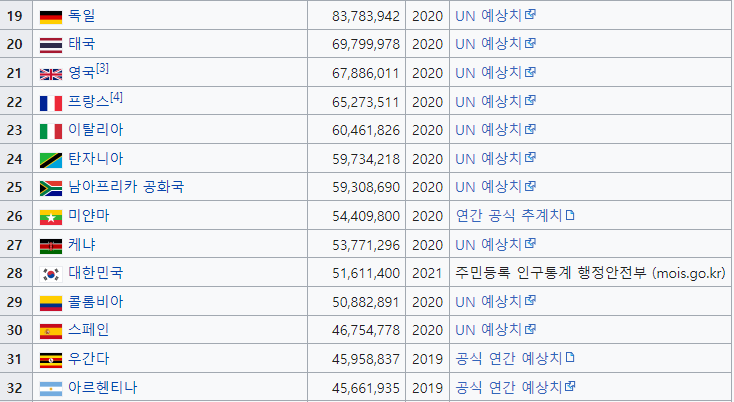

출처 : 위키백과

In [6]:
death[death['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21
258,Anguilla,United Kingdom,18.220600,-63.068600,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
259,Bermuda,United Kingdom,32.307800,-64.750500,0,0,0,0,0,0,...,75,75,82,82,87,87,89,89,89,89
260,British Virgin Islands,United Kingdom,18.420700,-64.640000,0,0,0,0,0,0,...,37,37,37,37,37,37,37,37,37,37
261,Cayman Islands,United Kingdom,19.313300,-81.254600,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
262,Channel Islands,United Kingdom,49.372300,-2.364400,0,0,0,0,0,0,...,97,97,97,97,99,99,100,100,100,100
263,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,Gibraltar,United Kingdom,36.140800,-5.353600,0,0,0,0,0,0,...,97,97,97,97,97,97,97,97,97,97
265,Isle of Man,United Kingdom,54.236100,-4.548100,0,0,0,0,0,0,...,52,52,52,52,52,54,54,54,54,54
266,Montserrat,United Kingdom,16.742498,-62.187366,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
267,"Saint Helena, Ascension and Tristan da Cunha",United Kingdom,-7.946700,-14.355900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


확인해보니 영국은 지역별로 데이터가 있는 것 같다! 국가별 데이터만 필요하니 마지막 줄만 가져오자

In [7]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 633 entries, Province/State to 2010-11-21
dtypes: float64(2), int64(629), object(2)
memory usage: 1.3+ MB


In [8]:
data_all_confirmed = pd.concat([
    confirmed[confirmed['Country/Region'] == 'Korea, South'],
    confirmed[confirmed['Country/Region'] == 'Argentina'],
    confirmed[confirmed['Country/Region'] == 'Germany'],
    confirmed[confirmed['Country/Region'] == 'Italy'],
    pd.DataFrame(confirmed[confirmed['Country/Region']
                           == 'United Kingdom'].iloc[-1, :]).T,

])

data_all_death = pd.concat([
    death[death['Country/Region'] == 'Korea, South'],
    death[death['Country/Region'] == 'Argentina'],
    death[death['Country/Region'] == 'Germany'],
    death[death['Country/Region'] == 'Italy'],
    pd.DataFrame(death[death['Country/Region'] ==
                       'United Kingdom'].iloc[-1, :]).T,

])

In [9]:
data_all_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2010-02-21,2010-03-21,2010-04-21,2010-05-21,2010-06-21,2010-07-21,2010-08-21,2010-09-21,2010-10-21,2010-11-21
160,NaN,"Korea, South",35.9078,127.767,1,1,2,2,3,4,...,318105,319777,321352,323379,325804,327976,329925,331519,332816,334163
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275
134,NaN,Germany,51.1657,10.4515,0,0,0,0,0,1,...,4255543,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346
153,NaN,Italy,41.8719,12.5674,0,0,0,0,0,0,...,4679067,4682034,4683646,4686109,4689341,4692274,4695291,4698038,4700316,4701832
269,NaN,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,7871014,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769


In [10]:
# 필요한 컬럼만 남기고 제거
del data_all_confirmed['Province/State']
del data_all_confirmed['Lat']
del data_all_confirmed['Long']

del data_all_death['Province/State']
del data_all_death['Lat']
del data_all_death['Long']

In [11]:
data_all_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2010-02-21,2010-03-21,2010-04-21,2010-05-21,2010-06-21,2010-07-21,2010-08-21,2010-09-21,2010-10-21,2010-11-21
160,"Korea, South",1,1,2,2,3,4,4,4,4,...,318105,319777,321352,323379,325804,327976,329925,331519,332816,334163
6,Argentina,0,0,0,0,0,0,0,0,0,...,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275
134,Germany,0,0,0,0,0,1,4,4,4,...,4255543,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346
153,Italy,0,0,0,0,0,0,0,0,0,...,4679067,4682034,4683646,4686109,4689341,4692274,4695291,4698038,4700316,4701832
269,United Kingdom,0,0,0,0,0,0,0,0,0,...,7871014,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769


In [12]:
data_all_death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21
160,"Korea, South",0,0,0,0,0,0,0,0,0,...,2507,2513,2524,2536,2544,2554,2560,2575,2583,2594
6,Argentina,0,0,0,0,0,0,0,0,0,...,115239,115245,115283,115323,115379,115416,115444,115458,115473,115491
134,Germany,0,0,0,0,0,0,0,0,0,...,93791,93798,93887,93963,94031,94117,94182,94206,94213,94308
153,Italy,0,0,0,0,0,0,0,0,0,...,130998,131031,131068,131118,131157,131198,131228,131274,131301,131335
269,United Kingdom,0,0,0,0,0,0,0,0,0,...,136910,136953,136986,137152,137295,137417,137541,137697,137735,137763


## Column Rename, Transpose

엇 근데 컬럼명이 이상한 것들이 있다 아무래도 날짜 범위가 2020-01-22부터 2021-10-11까지 인 듯한데, 잘못 인식 된 것 같다.

pd.date_range와 길이를 비교해보고, 다시 지정해주자

In [13]:
date_list = [date.strftime('%Y-%m-%d')
             for date in pd.date_range('20200122', '20211011')]
date_list[-5:], len(date_list)

(['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10', '2021-10-11'], 629)

Country/Region를 제외한 column의 갯수와 629개로 동일하다! 이제 columns를 rename해주자

In [14]:
data_all_confirmed = data_all_confirmed.set_index('Country/Region')
data_all_confirmed.columns = date_list
data_all_confirmed

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11
Country/Region,,,,,,,,,,,,,,,,,,,,,
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,318105,319777,321352,323379,325804,327976,329925,331519,332816,334163
Argentina,0,0,0,0,0,0,0,0,0,0,...,5259352,5259738,5260719,5261935,5263219,5264305,5265058,5265528,5265859,5266275
Germany,0,0,0,0,0,1,4,4,4,5,...,4255543,4260494,4265001,4272764,4284400,4295876,4305634,4312528,4318437,4323346
Italy,0,0,0,0,0,0,0,0,0,2,...,4679067,4682034,4683646,4686109,4689341,4692274,4695291,4698038,4700316,4701832
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,7871014,7900680,7934936,7967985,8006660,8046390,8081300,8120713,8154306,8193769


In [15]:
data_all_death = data_all_death.set_index('Country/Region')
data_all_death.columns = date_list
data_all_death

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11
Country/Region,,,,,,,,,,,,,,,,,,,,,
"Korea, South",0,0,0,0,0,0,0,0,0,0,...,2507,2513,2524,2536,2544,2554,2560,2575,2583,2594
Argentina,0,0,0,0,0,0,0,0,0,0,...,115239,115245,115283,115323,115379,115416,115444,115458,115473,115491
Germany,0,0,0,0,0,0,0,0,0,0,...,93791,93798,93887,93963,94031,94117,94182,94206,94213,94308
Italy,0,0,0,0,0,0,0,0,0,0,...,130998,131031,131068,131118,131157,131198,131228,131274,131301,131335
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,136910,136953,136986,137152,137295,137417,137541,137697,137735,137763


In [16]:
# Fbprophet을 사용할 때 처럼 Transpose 해주자
data_all_confirmed = data_all_confirmed.T
data_all_death = data_all_death.T

In [17]:
data_all_confirmed.tail()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2021-10-07,327976,5264305,4295876,4692274,8046390
2021-10-08,329925,5265058,4305634,4695291,8081300
2021-10-09,331519,5265528,4312528,4698038,8120713
2021-10-10,332816,5265859,4318437,4700316,8154306
2021-10-11,334163,5266275,4323346,4701832,8193769


In [18]:
data_all_death.tail()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2021-10-07,2554,115416,94117,131198,137417
2021-10-08,2560,115444,94182,131228,137541
2021-10-09,2575,115458,94206,131274,137697
2021-10-10,2583,115473,94213,131301,137735
2021-10-11,2594,115491,94308,131335,137763


잘 나온 것 같다! 엇...그런데 type이 object?

In [19]:
data_all_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Korea, South    629 non-null    object
 1   Argentina       629 non-null    object
 2   Germany         629 non-null    object
 3   Italy           629 non-null    object
 4   United Kingdom  629 non-null    object
dtypes: object(5)
memory usage: 49.5+ KB


## Type Casting : Object $\rightarrow$ int
그렇다면, int로 typecasting해주자

In [20]:
data_all_confirmed = data_all_confirmed.astype(int)
data_all_death = data_all_death.astype(int)

In [21]:
data_all_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Korea, South    629 non-null    int32
 1   Argentina       629 non-null    int32
 2   Germany         629 non-null    int32
 3   Italy           629 non-null    int32
 4   United Kingdom  629 non-null    int32
dtypes: int32(5)
memory usage: 37.2+ KB


In [22]:
data_all_death.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Korea, South    629 non-null    int32
 1   Argentina       629 non-null    int32
 2   Germany         629 non-null    int32
 3   Italy           629 non-null    int32
 4   United Kingdom  629 non-null    int32
dtypes: int32(5)
memory usage: 37.2+ KB


## Daily Data : 일일 확진자수 / 사망자수

지금까지 구한 데이터는 누계 확진자수 / 사망자수 이다.

따라서, 일일 확진자 데이터 또한 만들어 보자.


In [23]:
def daily_increase(data):
    daily = []
    for i in range(len(data)):
        if daily == []:
            daily.append(data.iloc[0])
        else:
            daily.append(data.iloc[i]-data.iloc[i-1])
    return daily

In [24]:
data_all_confirmed_daily = pd.concat(
    daily_increase(data_all_confirmed), axis=1)
data_all_confirmed_daily.columns = date_list
data_all_confirmed_daily = data_all_confirmed_daily.T
data_all_confirmed_daily.tail()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2021-10-07,2172,1086,11476,2933,39730
2021-10-08,1949,753,9758,3017,34910
2021-10-09,1594,470,6894,2747,39413
2021-10-10,1297,331,5909,2278,33593
2021-10-11,1347,416,4909,1516,39463


In [25]:
data_all_death_daily = pd.concat(daily_increase(data_all_death), axis=1)
data_all_death_daily.columns = date_list
data_all_death_daily = data_all_death_daily.T
data_all_death_daily.tail()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2021-10-07,10,37,86,41,122
2021-10-08,6,28,65,30,124
2021-10-09,15,14,24,46,156
2021-10-10,8,15,7,27,38
2021-10-11,11,18,95,34,28


In [26]:
data_all_confirmed_daily.info(), data_all_death_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Korea, South    629 non-null    int32
 1   Argentina       629 non-null    int32
 2   Germany         629 non-null    int32
 3   Italy           629 non-null    int32
 4   United Kingdom  629 non-null    int32
dtypes: int32(5)
memory usage: 17.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2020-01-22 to 2021-10-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Korea, South    629 non-null    int32
 1   Argentina       629 non-null    int32
 2   Germany         629 non-null    int32
 3   Italy           629 non-null    int32
 4   United Kingdom  629 non-null    int32
dtypes: int32(5)
memory usage: 17.2+ KB


(None, None)

null 값도 없고, DataType도 int64로 데이터가 잘 정리된 것 같다!

# 3) 시각화

## 확진자수 (confirmed)

<AxesSubplot:>

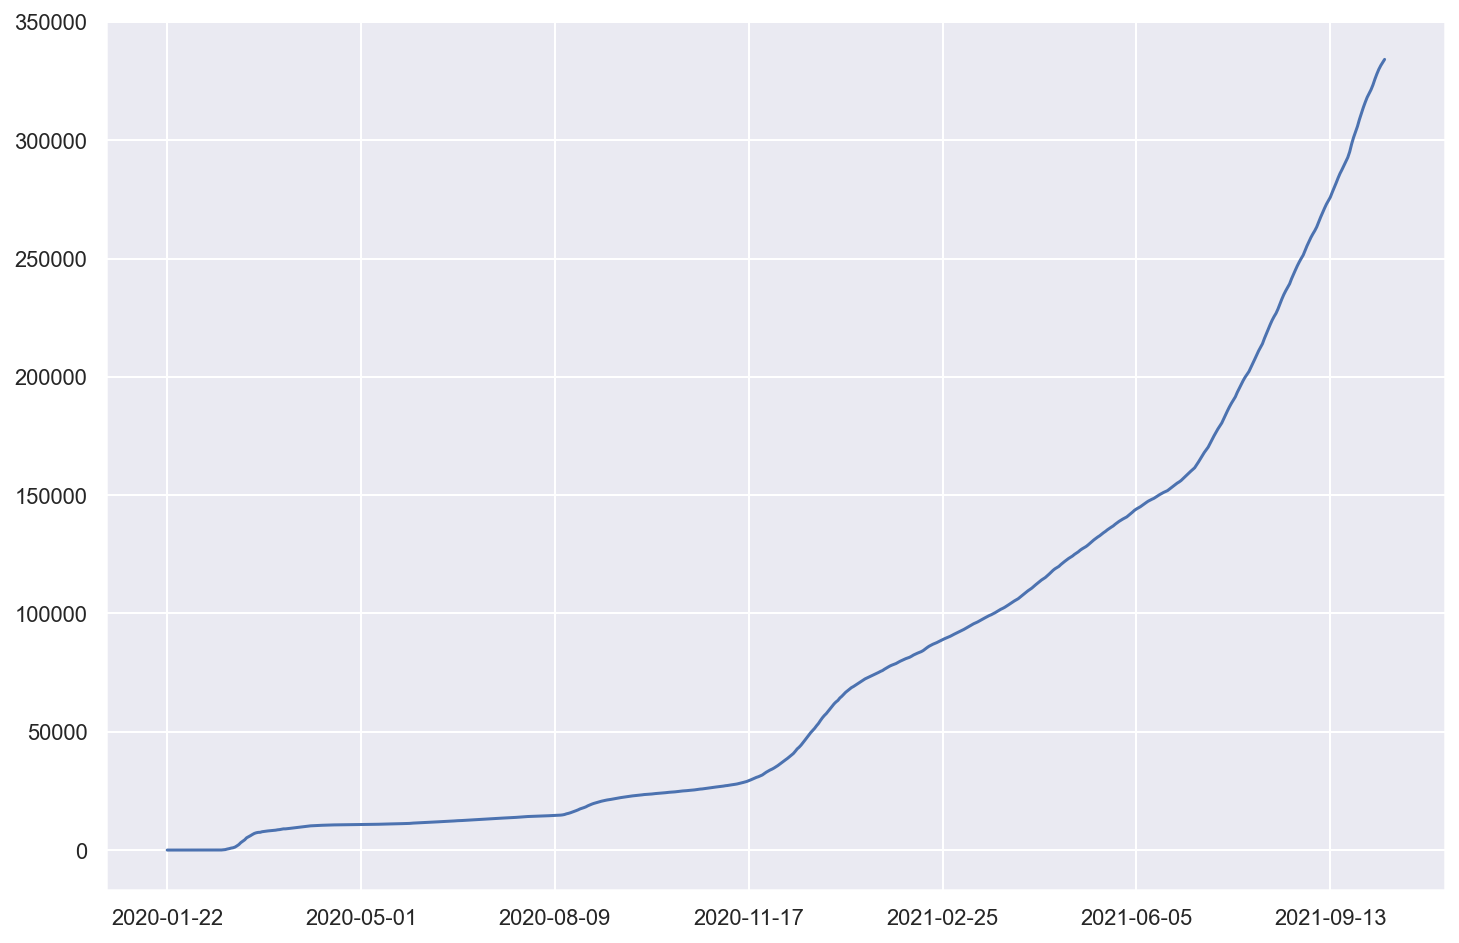

In [27]:
plt.figure(figsize=(12, 8))
data_all_confirmed['Korea, South'].plot()

<AxesSubplot:>

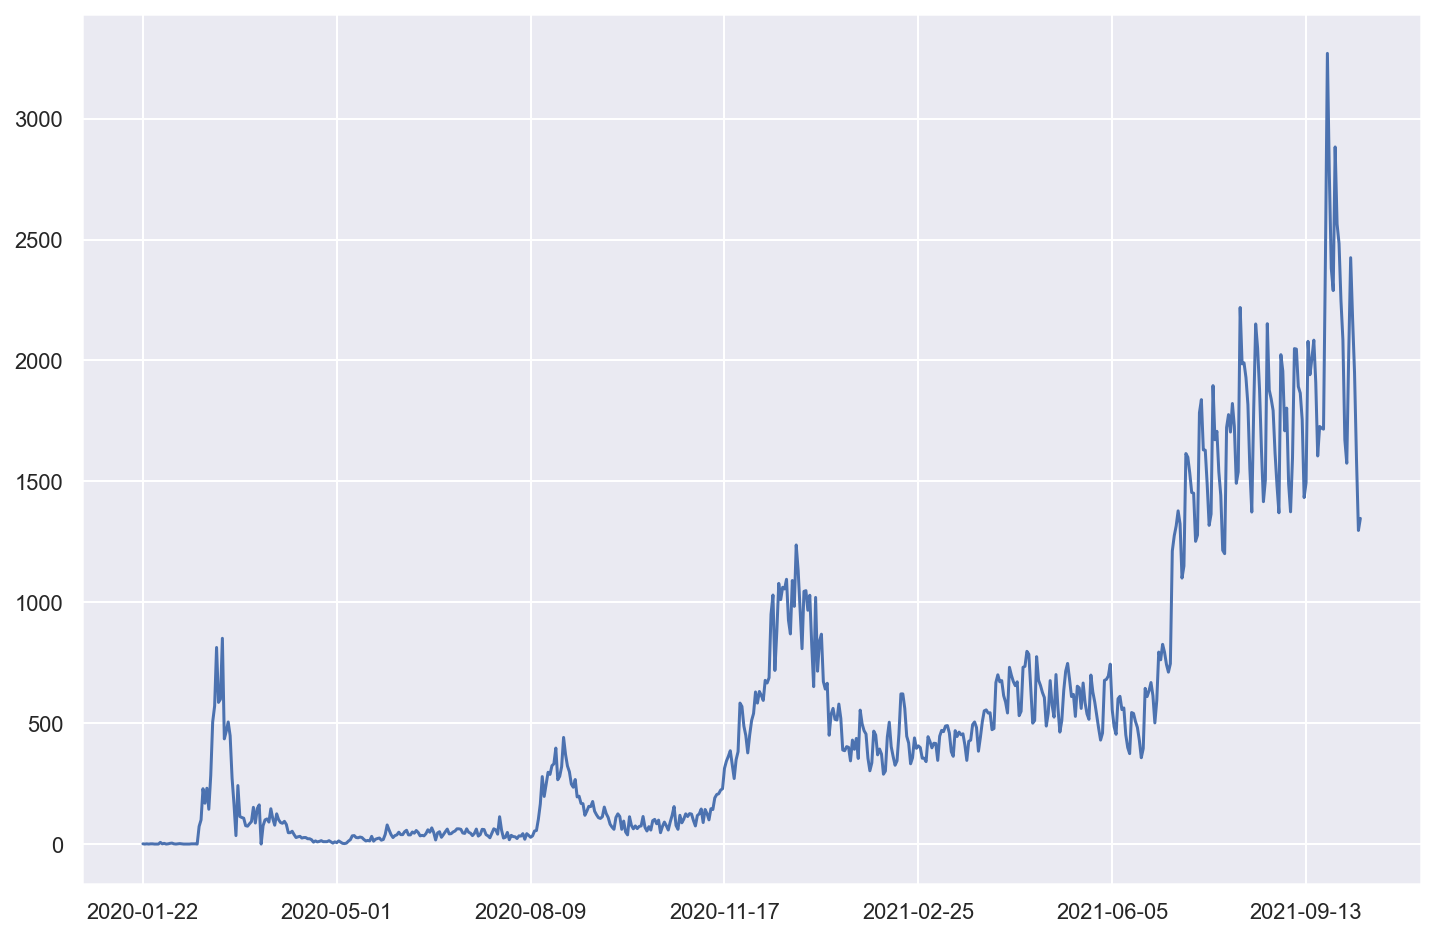

In [28]:
plt.figure(figsize=(12, 8))
data_all_confirmed_daily['Korea, South'].plot()

미친듯한 성장세...? 우리나라가 잘못하고 있는것인가...?

다른 나라들과 함께 살펴보면...

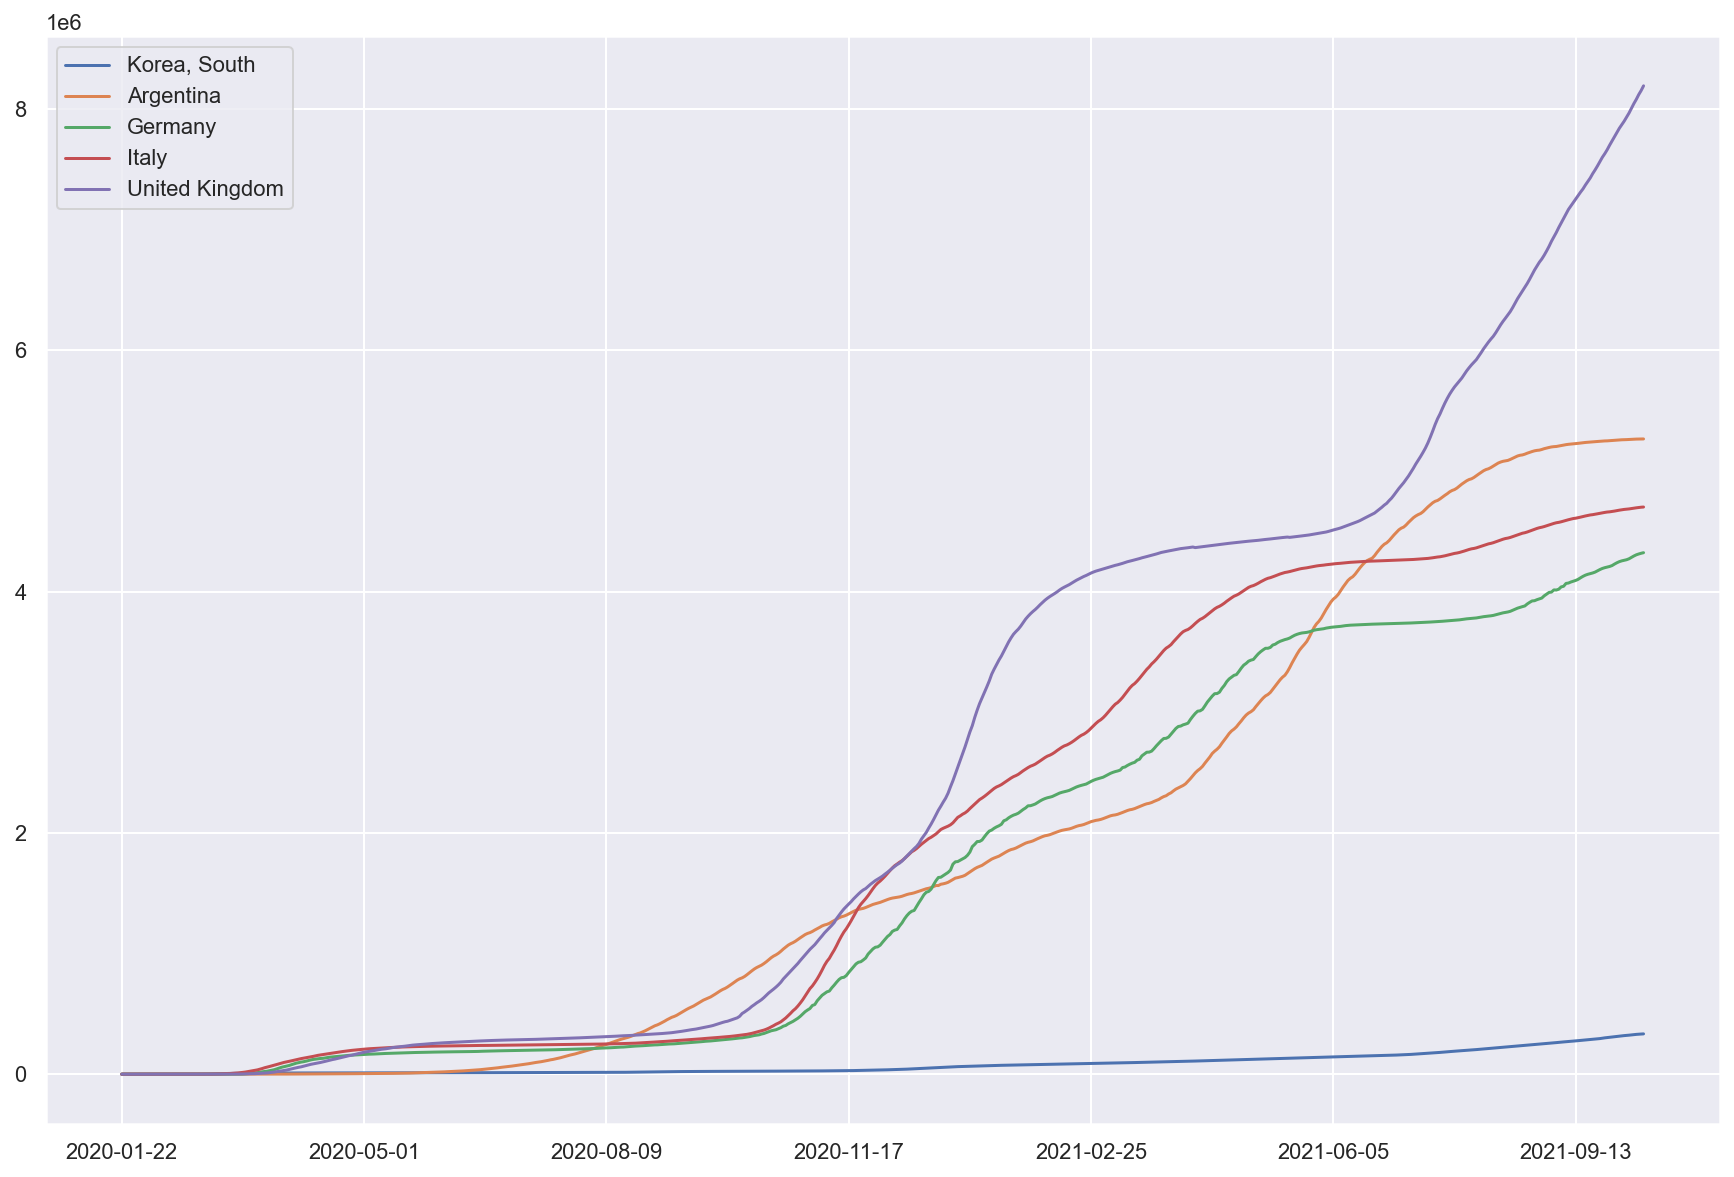

In [29]:
plt.figure(figsize=(15, 10))
data_all_confirmed['Korea, South'].plot()
data_all_confirmed['Argentina'].plot()
data_all_confirmed['Germany'].plot()
data_all_confirmed['Italy'].plot()
data_all_confirmed['United Kingdom'].plot()
plt.legend()
plt.show()

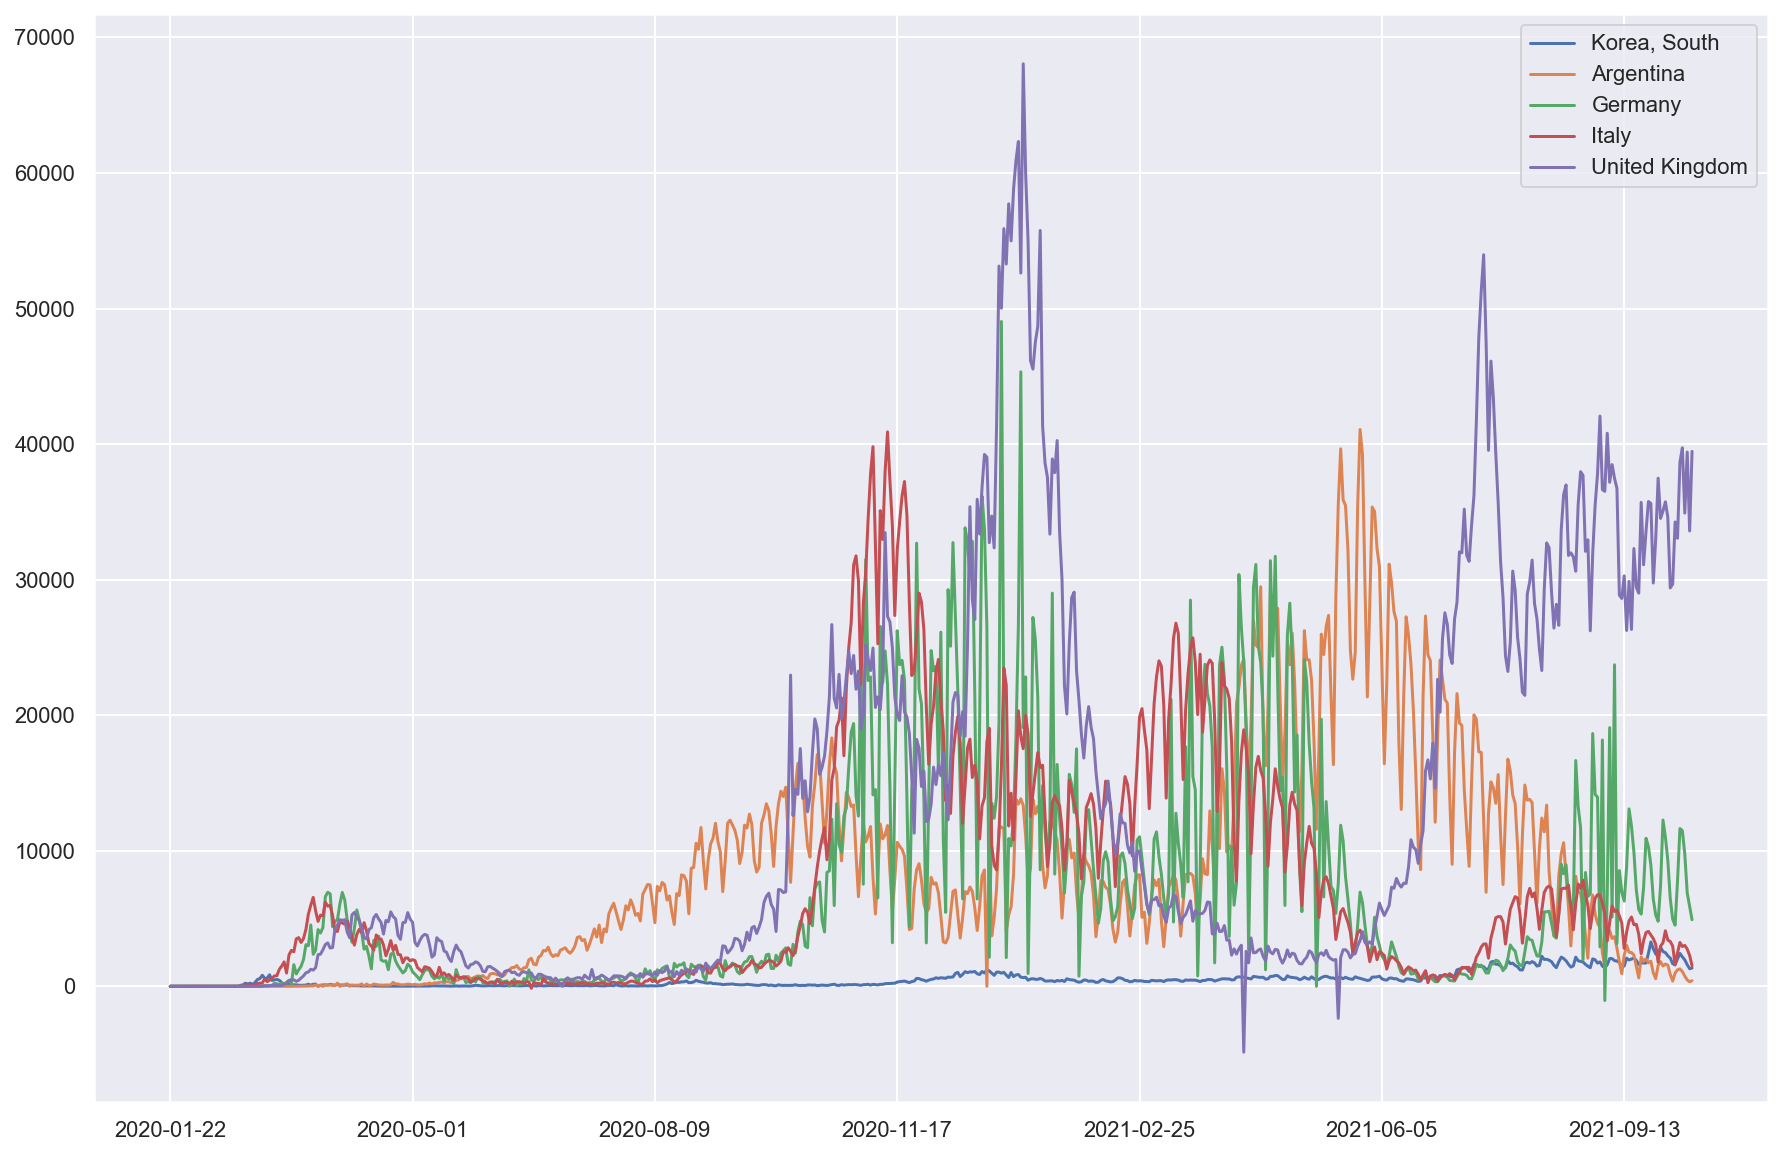

In [30]:
plt.figure(figsize=(15, 10))
data_all_confirmed_daily['Korea, South'].plot()
data_all_confirmed_daily['Argentina'].plot()
data_all_confirmed_daily['Germany'].plot()
data_all_confirmed_daily['Italy'].plot()
data_all_confirmed_daily['United Kingdom'].plot()
plt.legend()
plt.show()

## 사망자수 (death)

<AxesSubplot:>

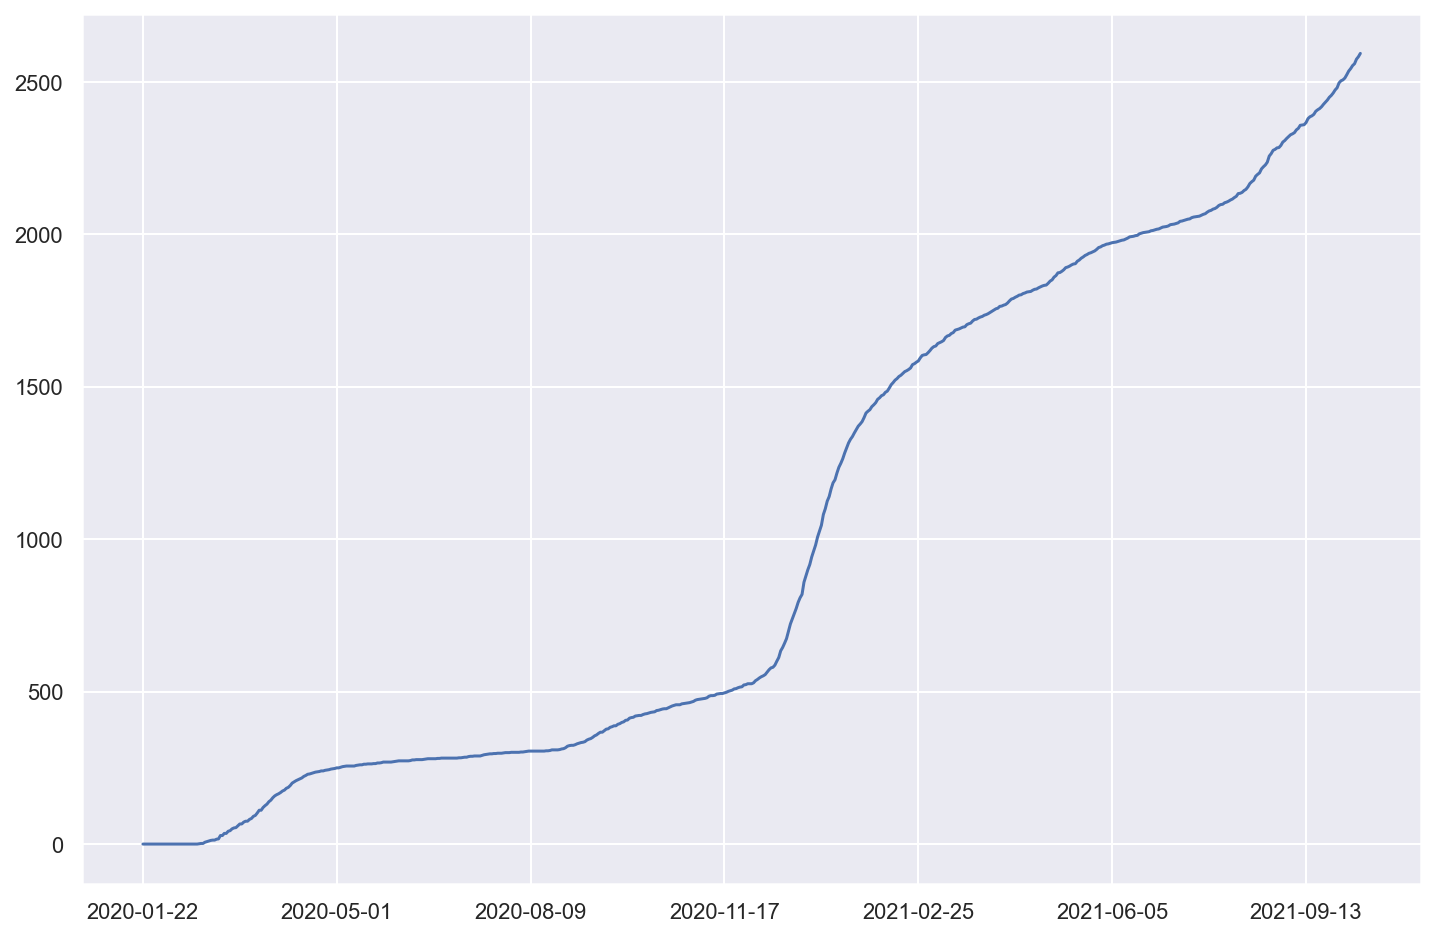

In [31]:
plt.figure(figsize=(12, 8))
data_all_death['Korea, South'].plot()

<AxesSubplot:>

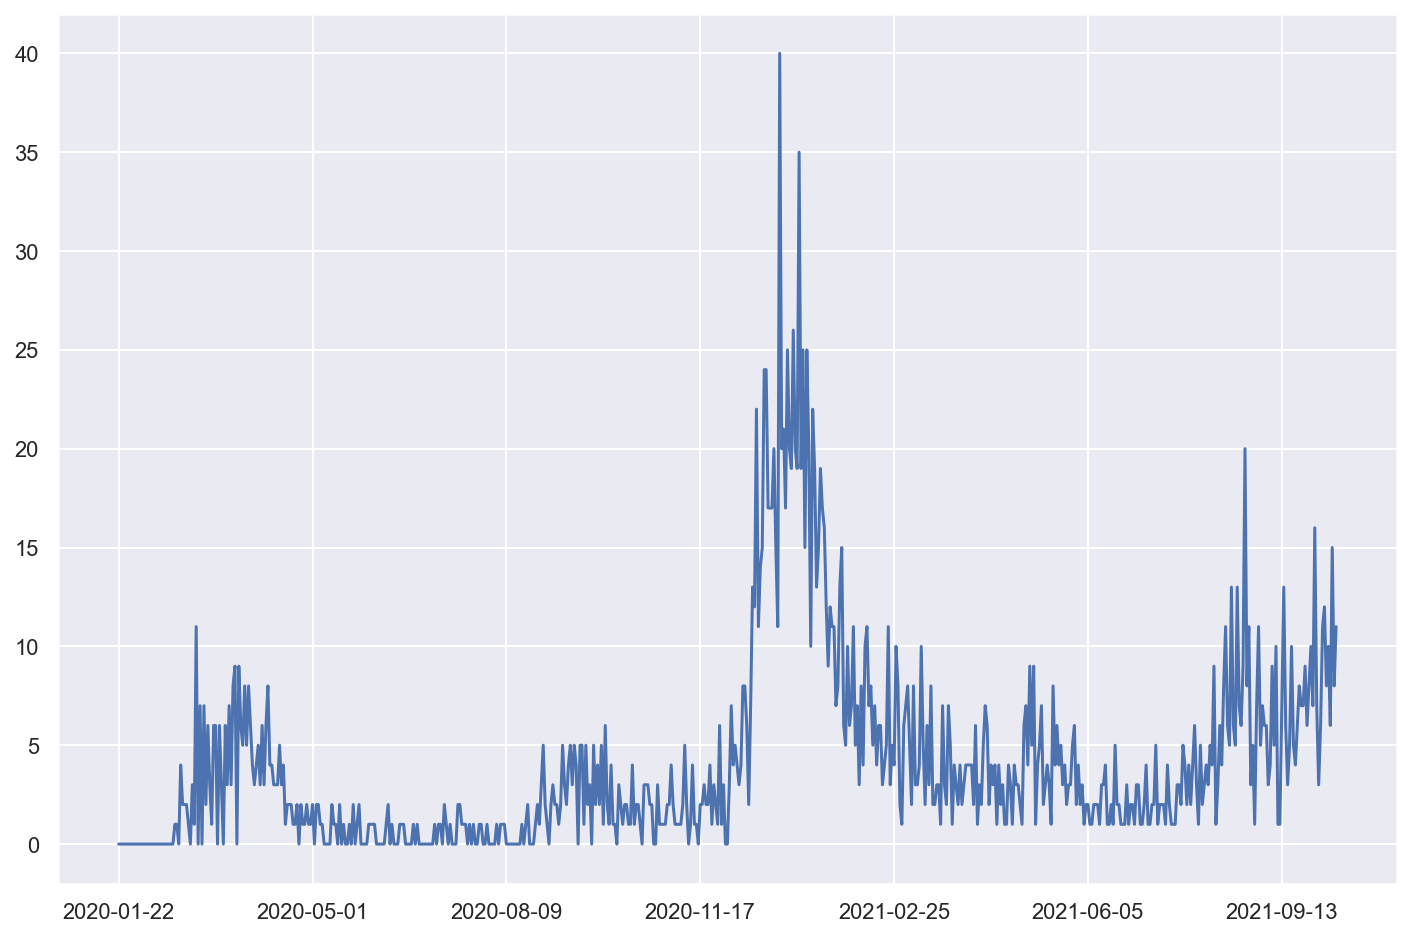

In [32]:
plt.figure(figsize=(12, 8))
data_all_death_daily['Korea, South'].plot()

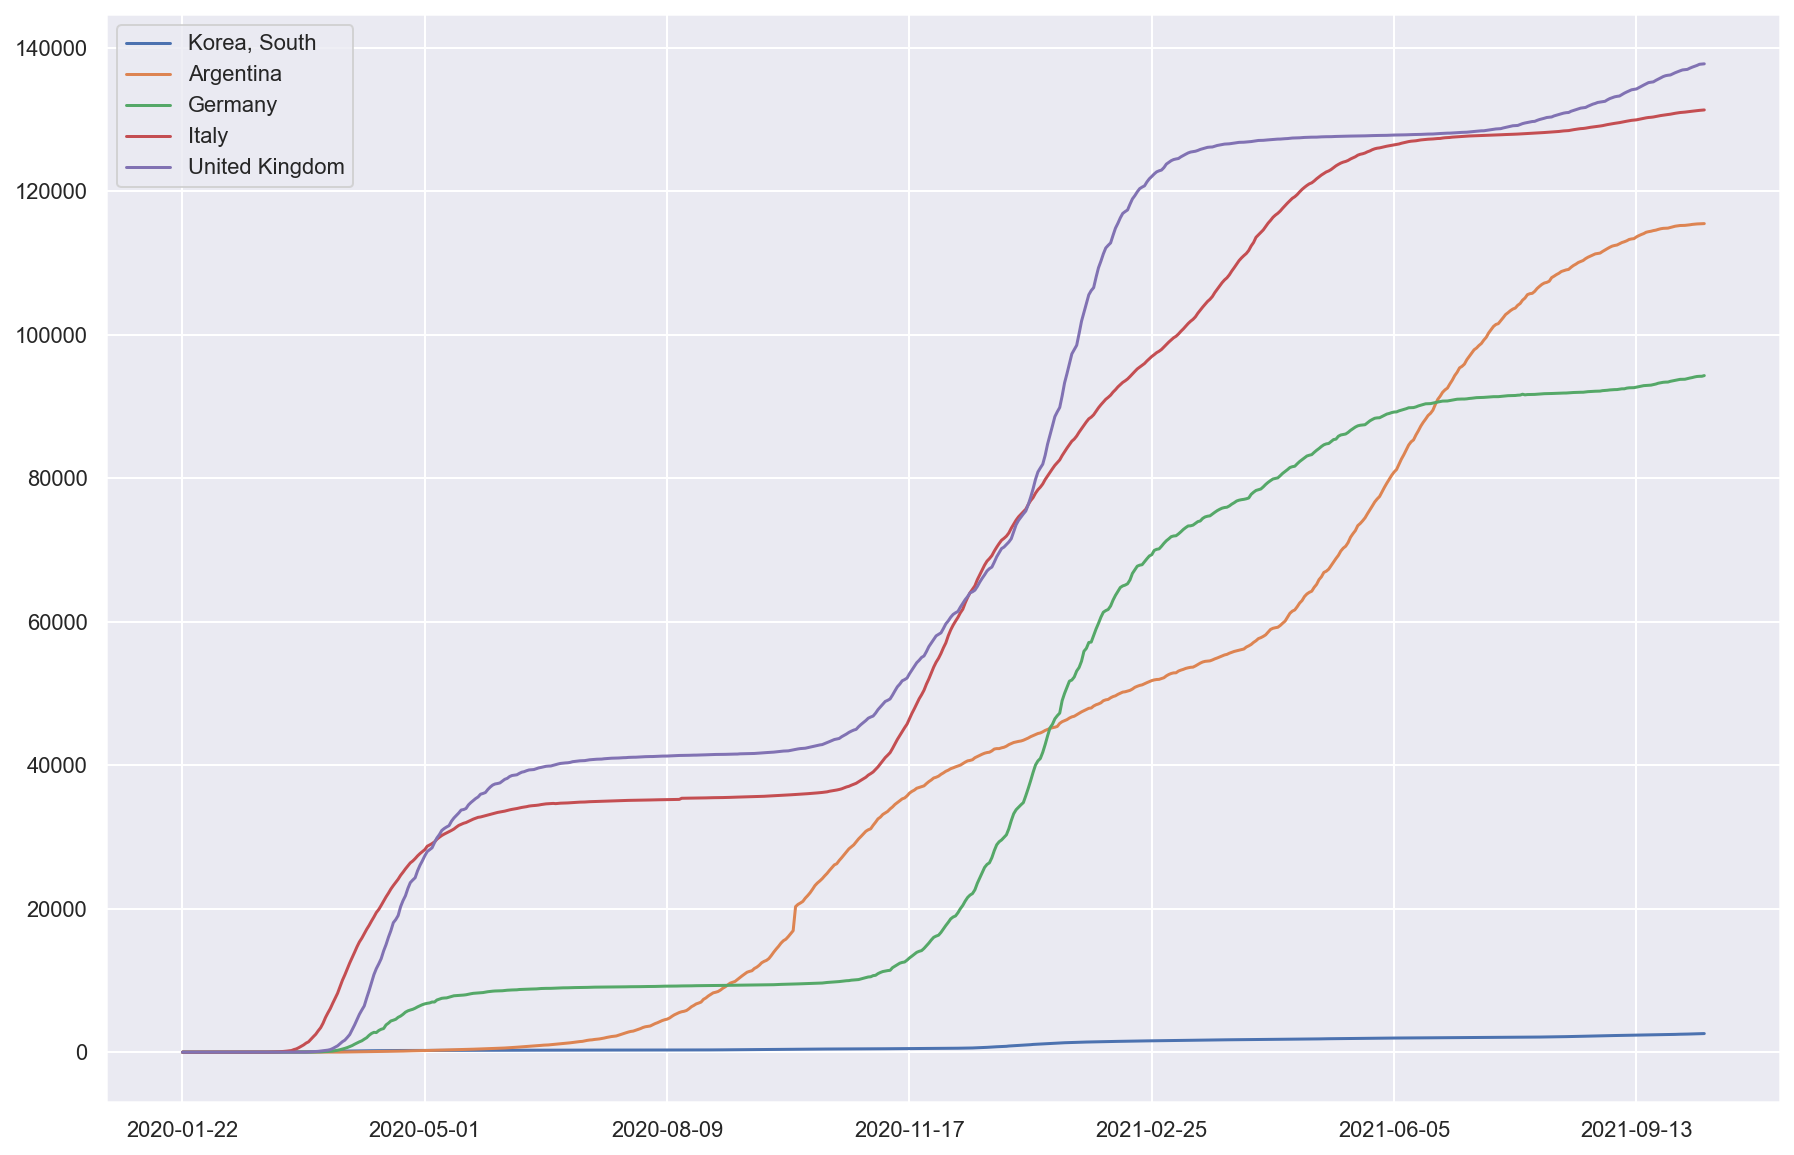

In [33]:
plt.figure(figsize=(15, 10))
data_all_death['Korea, South'].plot()
data_all_death['Argentina'].plot()
data_all_death['Germany'].plot()
data_all_death['Italy'].plot()
data_all_death['United Kingdom'].plot()
plt.legend()
plt.show()

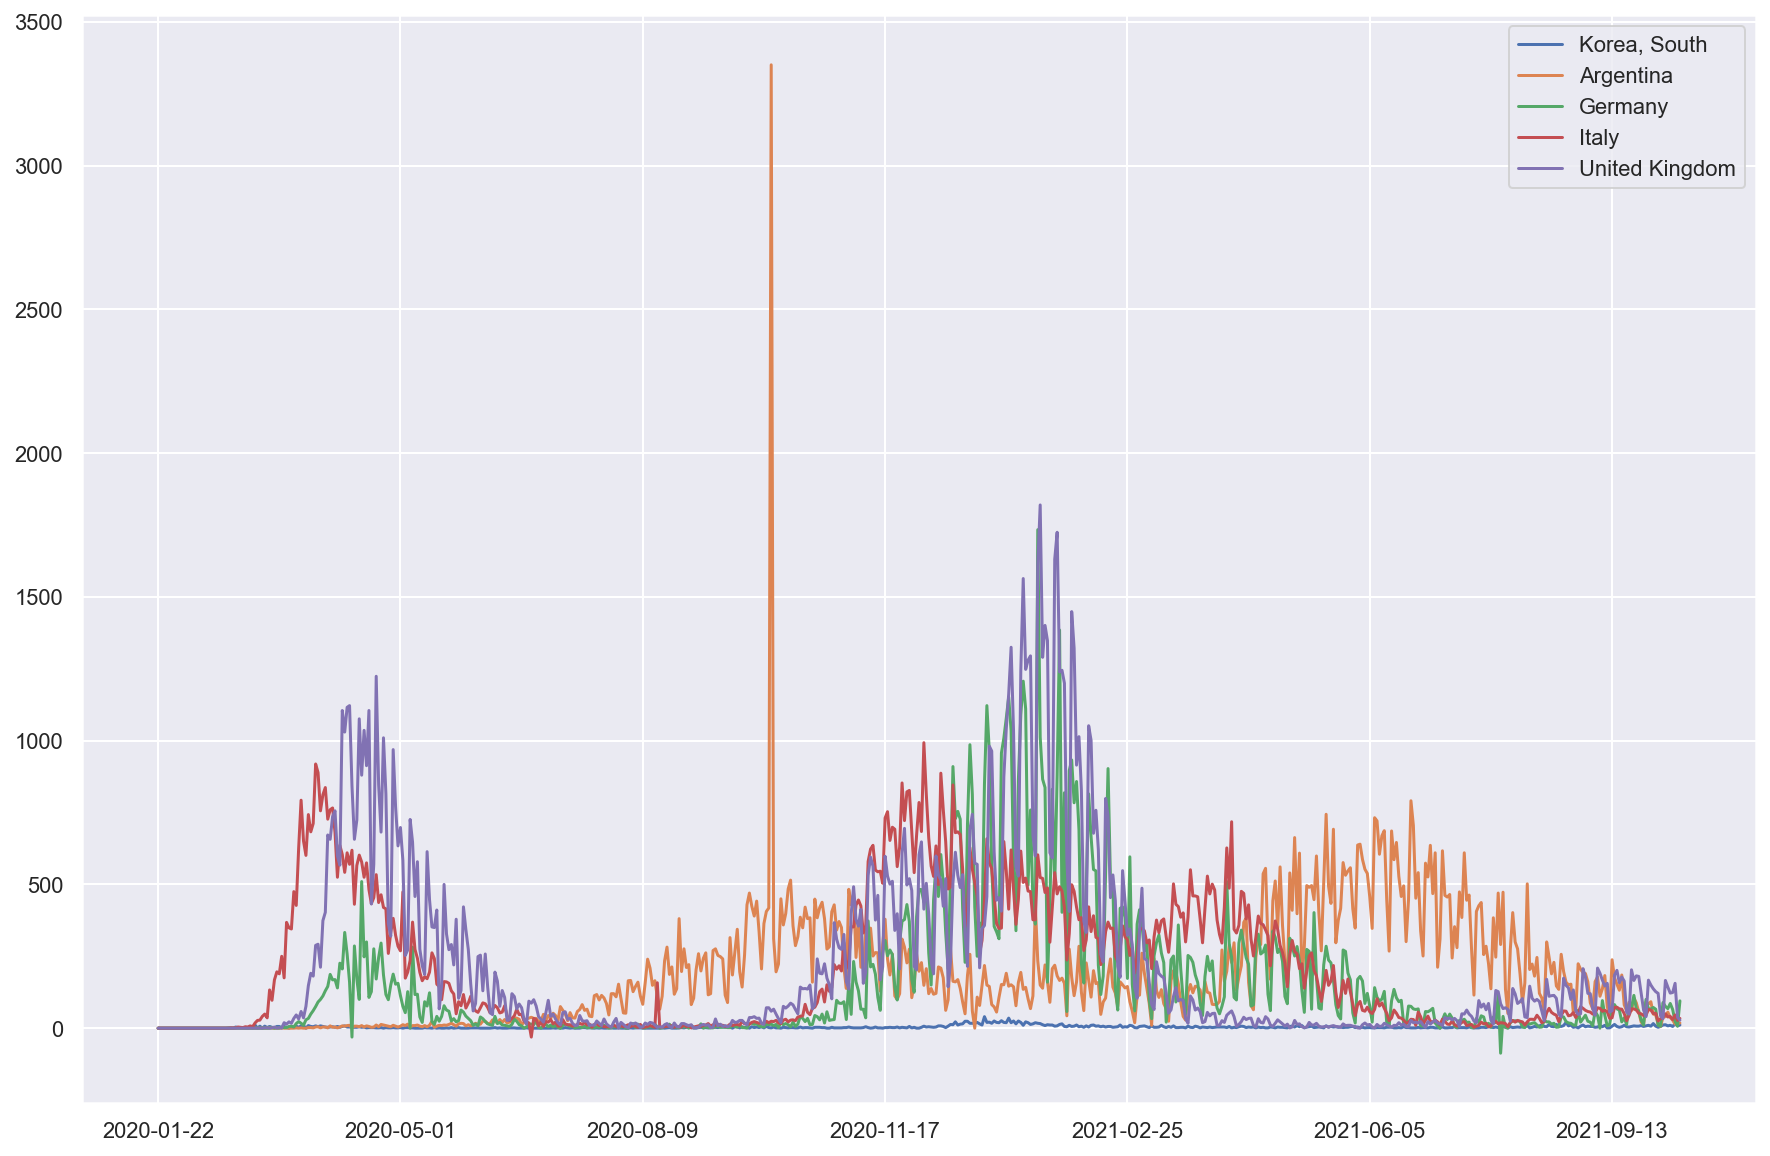

In [34]:
plt.figure(figsize=(15, 10))
data_all_death_daily['Korea, South'].plot()
data_all_death_daily['Argentina'].plot()
data_all_death_daily['Germany'].plot()
data_all_death_daily['Italy'].plot()
data_all_death_daily['United Kingdom'].plot()
plt.legend()
plt.show()

## 분석 결과
엇... 나름 잘하고 있는걸지도...?

다른 나라들에 비하면 확진자수 / 사망자수가 월등히 적은 것을 알 수 있다.

하지만, 우리나라의 인구수와 비슷한 나라를 골랐다고 해도 차이가 날 수 있으니, 인구수 대비로 구해보자

# 4) 인구수별 비율

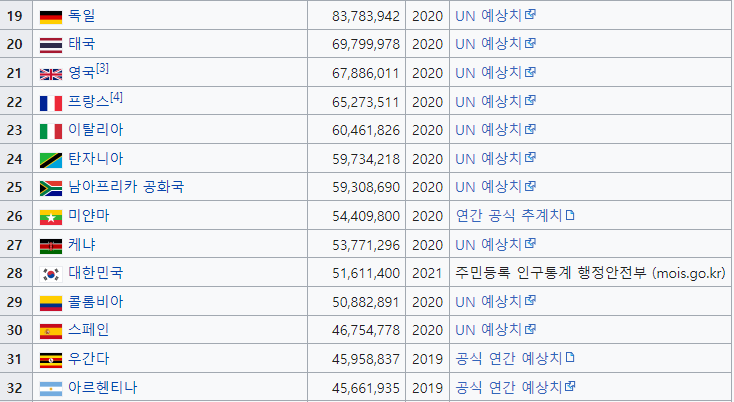

출처 : 위키백과

## 확진자수 (confirmed)

Percentage로 바꿔주기 위해서, 인구수로 나누고 100을 곱해주었다

In [35]:
data_confirmed_pop = data_all_confirmed.copy()
data_confirmed_pop['Korea, South'] = data_confirmed_pop['Korea, South']/51611400 * 100
data_confirmed_pop['Argentina'] = data_confirmed_pop['Argentina']/45661935 * 100
data_confirmed_pop['Germany'] = data_confirmed_pop['Germany']/83783942 * 100
data_confirmed_pop['Italy'] = data_confirmed_pop['Italy']/60461826 * 100
data_confirmed_pop['United Kingdom'] = data_confirmed_pop['United Kingdom']/67886011 * 100

In [36]:
data_confirmed_pop

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2020-01-22,0.000002,0.000000,0.000000,0.000000,0.000000
2020-01-23,0.000002,0.000000,0.000000,0.000000,0.000000
2020-01-24,0.000004,0.000000,0.000000,0.000000,0.000000
2020-01-25,0.000004,0.000000,0.000000,0.000000,0.000000
2020-01-26,0.000006,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-10-07,0.635472,11.528870,5.127326,7.760722,11.852795
2021-10-08,0.639248,11.530519,5.138973,7.765712,11.904220
2021-10-09,0.642337,11.531548,5.147201,7.770255,11.962277
2021-10-10,0.644850,11.532273,5.154254,7.774023,12.011762


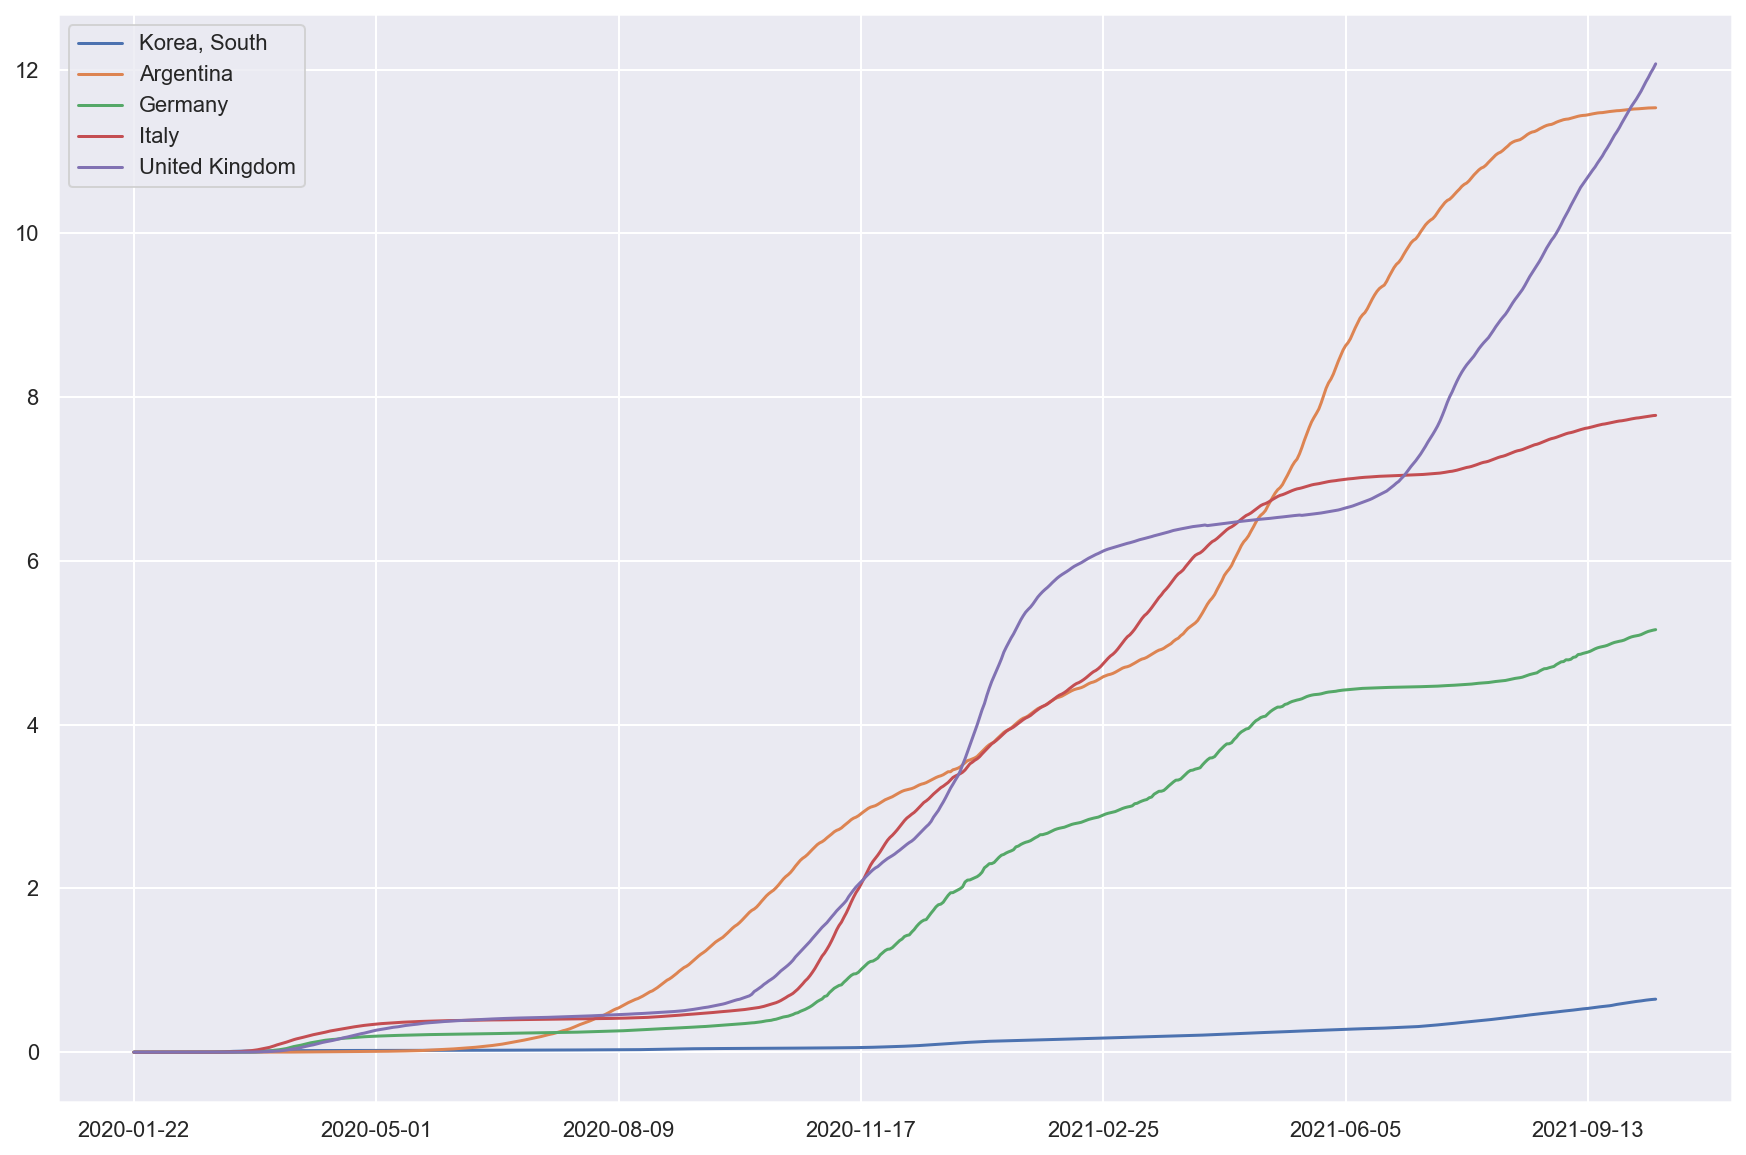

In [37]:
plt.figure(figsize=(15, 10))
data_confirmed_pop['Korea, South'].plot()
data_confirmed_pop['Argentina'].plot()
data_confirmed_pop['Germany'].plot()
data_confirmed_pop['Italy'].plot()
data_confirmed_pop['United Kingdom'].plot()
plt.legend()
plt.show()

## 사망자수 (death)

In [38]:
data_death_pop = data_all_death.copy()
data_death_pop['Korea, South'] = data_death_pop['Korea, South']/51611400 * 100
data_death_pop['Argentina'] = data_death_pop['Argentina']/45661935 * 100
data_death_pop['Germany'] = data_death_pop['Germany']/83783942 * 100
data_death_pop['Italy'] = data_death_pop['Italy']/60461826 * 100
data_death_pop['United Kingdom'] = data_death_pop['United Kingdom']/67886011 * 100

In [39]:
data_death_pop

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
2020-01-22,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-23,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-25,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-26,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-10-07,0.004949,0.252762,0.112333,0.216993,0.202423
2021-10-08,0.004960,0.252823,0.112411,0.217043,0.202606
2021-10-09,0.004989,0.252854,0.112439,0.217119,0.202836
2021-10-10,0.005005,0.252887,0.112448,0.217163,0.202892


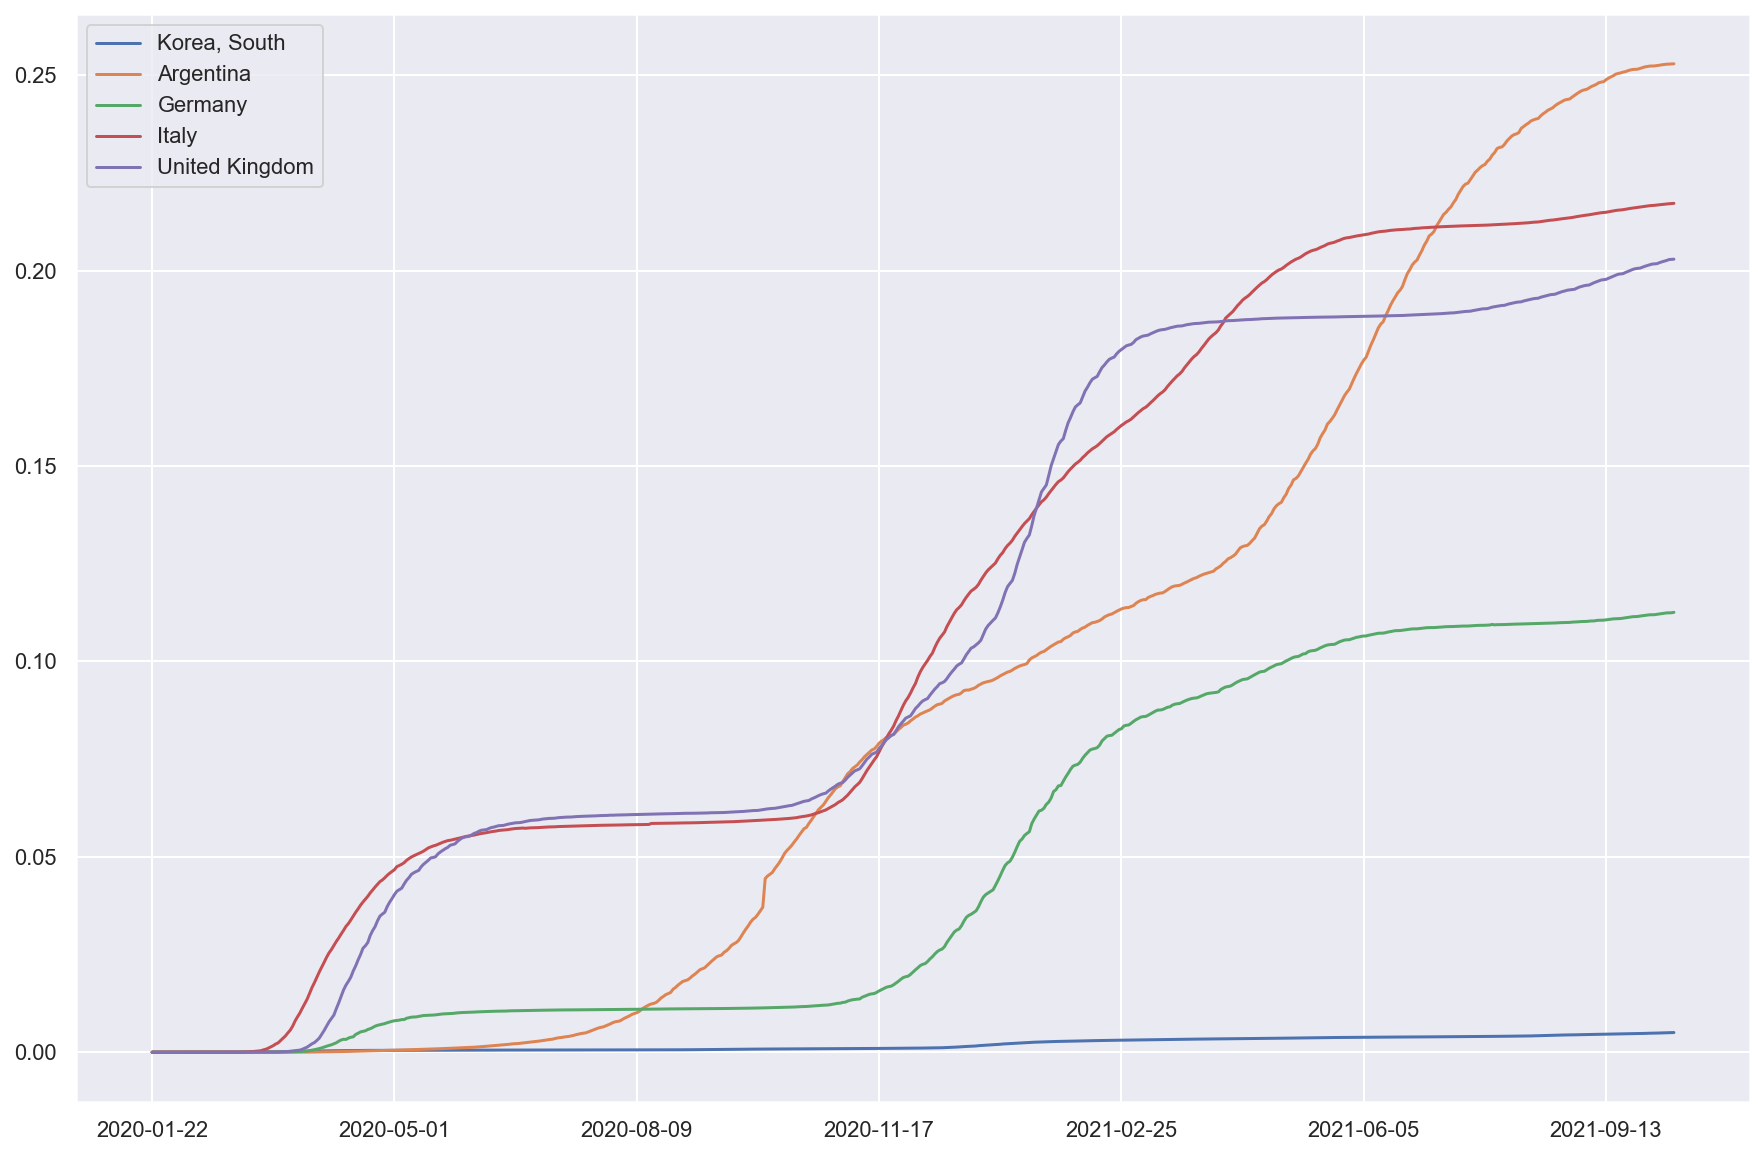

In [40]:
plt.figure(figsize=(15, 10))
data_death_pop['Korea, South'].plot()
data_death_pop['Argentina'].plot()
data_death_pop['Germany'].plot()
data_death_pop['Italy'].plot()
data_death_pop['United Kingdom'].plot()
plt.legend()
plt.show()

## 분석 결과
음 인구수 대비로 봐도 확진자수와 사망자수 모두 우리나라가 굉장히 선방하고 있는 것을 볼 수 있다. (흐뭇)

# 5) 시계열 분석

- 전체 데이터의 시계열 분석을 통해 전체 트렌드와 주기별 특성을 관찰해주세요
- 어떤 특이점이 있나요?
- 5개 각 국가의 데이터에서는 동일과정에서 어떤 특이한 현상이 있나요?

## 전체 데이터 분석

### 전체 데이터를 구하기 위해 5개국의 확진자수 합계를 계산하자

In [46]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [48]:
data_all_confirmed_daily['All'] = data_all_confirmed_daily.sum(axis=1)

In [49]:
data_all_confirmed_daily

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom,All
2020-01-22,1,0,0,0,0,1
2020-01-23,0,0,0,0,0,0
2020-01-24,1,0,0,0,0,1
2020-01-25,0,0,0,0,0,0
2020-01-26,1,0,0,0,0,1
...,...,...,...,...,...,...
2021-10-07,2172,1086,11476,2933,39730,57397
2021-10-08,1949,753,9758,3017,34910,50387
2021-10-09,1594,470,6894,2747,39413,51118
2021-10-10,1297,331,5909,2278,33593,43408


### 시계열 분석을 통해, 전체 트렌드와 주기별 특성을 관찰해보자

In [50]:
df = pd.DataFrame({"ds": data_all_confirmed_daily.index,
                   "y": data_all_confirmed_daily['All']})
df.reset_index(drop=True, inplace=True)
df

,ds,y
0,2020-01-22,1
1,2020-01-23,0
2,2020-01-24,1
3,2020-01-25,0
4,2020-01-26,1
...,...,...
624,2021-10-07,57397
625,2021-10-08,50387
626,2021-10-09,51118
627,2021-10-10,43408


In [ ]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)
m.plot(forecast)

KeyError: 'metric_file'

In [ ]:
m.plot_components(forecast)

### 특이점 - Global
1. 전체적인 트렌드, 경향성은 증가하는 것으로 보인다.
2. 트렌드를 제거했을 때, 주중에 확진자수는 목요일에 제일 많은 것으로 보인다.
3. 트렌드를 제거했을 때, 확진자수는 6~7월에 가장 적고 1월 경에 가장 많은 것으로 보인다. (약 1년 9개월 간의 데이터로 분석한 것이기에, 연간 주기성은 정확하지 않을 것으로 보인다.)
4. 일별 정보이기에 daily 분석은 의미가 없다.

## 각 국가별 데이터 분석
- 확진자수 데이터로 시계열 분석을 진행해보자!

In [ ]:
def make_plot(data, country):
    df = pd.DataFrame({"ds": data.index, "y": data[country]})
    df.reset_index(drop=True, inplace=True)
    m = Prophet(yearly_seasonality=True, daily_seasonality=True)
    m.fit(df)
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    m.plot(forecast)
    m.plot_components(forecast)

### Korea (한국)

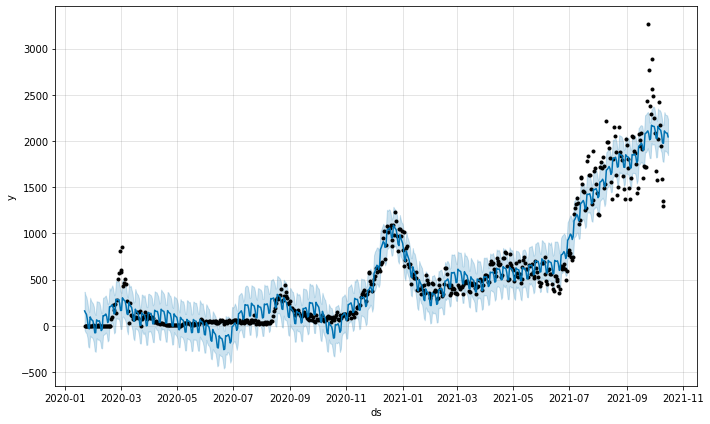

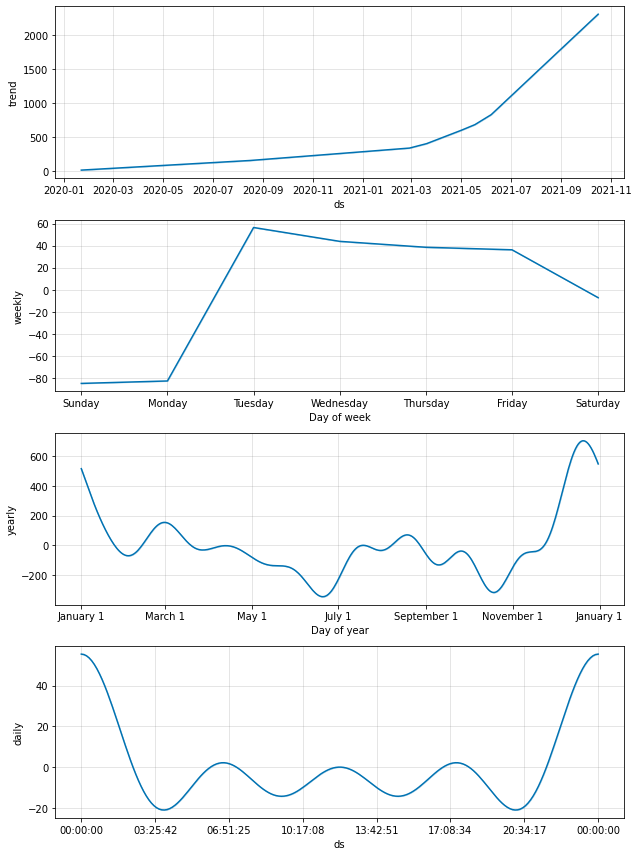

In [ ]:
make_plot(data_all_confirmed_daily, 'Korea, South')

### 특이점 - Korea
1. 전체적인 트렌드, 경향성 : 확진자수가 올해 3월까지는 완만히 증가하고 있었으나, 그 증가율이 3월에서 6월사이에 높아졌고, 계속해서 유지되고 있는 상황이다. 
2. 트렌드를 제거했을 때, 주중에 확진자수는 화요일에 가장 많이 나오는 것으로 보인다.
3. 트렌드를 제거했을 때, 연간 확진자수는 확진자수가 12월과 1월에 부근에서 가장 많고 6월, 7월 부근에서 가장 적은 것을 알 수 있다.

---

### Argentina (아르헨티나)

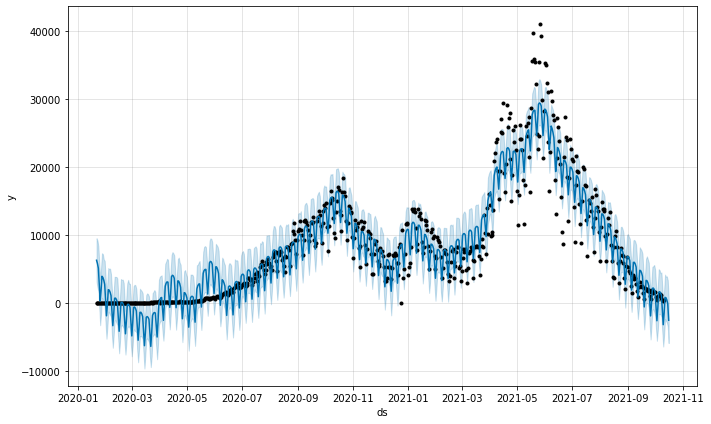

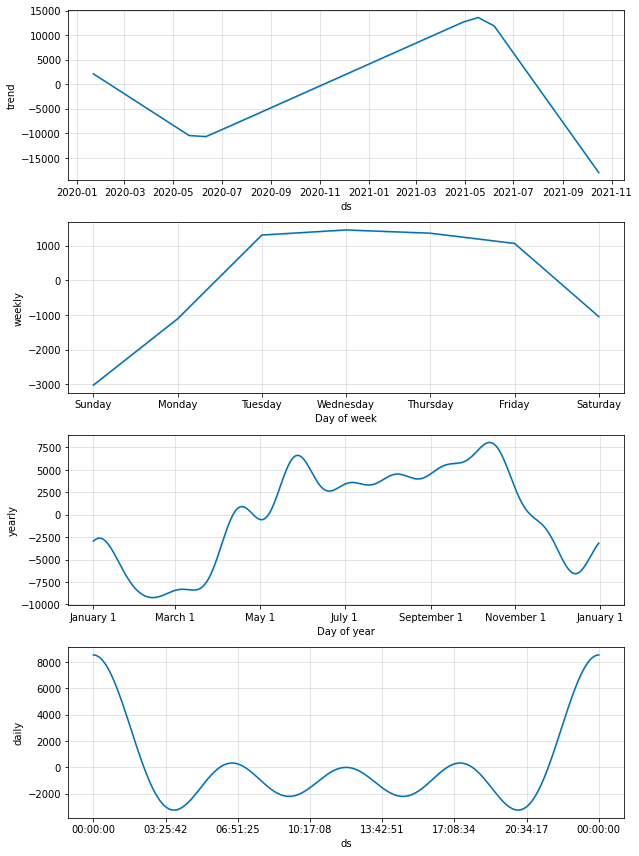

In [ ]:
make_plot(data_all_confirmed_daily, 'Argentina')

### 특이점 - Argentina
1. 전체적인 트렌드, 경향성은 계속해서 증가하고 있었지만, 올해 6월까지는 증가하다가 일일 확진자수가 굉장히 빠른 속도로 감소하고 있다.
2. 트렌드를 제거했을 때, 주중에 확진자수는 화, 수, 목, 3개의 요일이 가장 많은 것으로 보인다.
3. 트렌드를 제거했을 때, 연간 특성은 확진자수가 10월 부근에서 가장 많고 계속해서 감소하다가. 2,3월 부근에서 가장 적은 것을 알 수 있다. 

### Germany (독일)

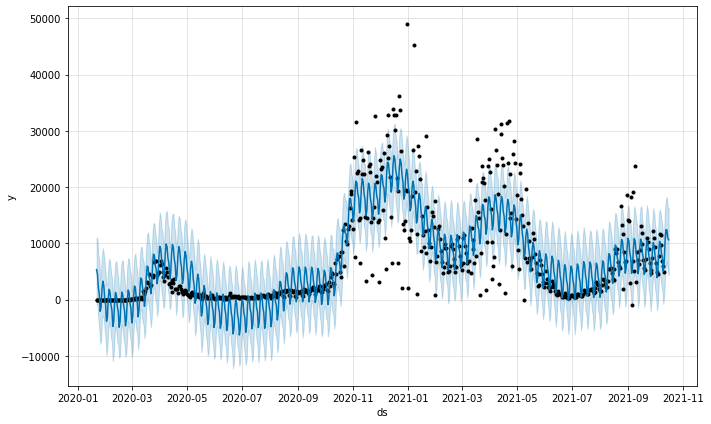

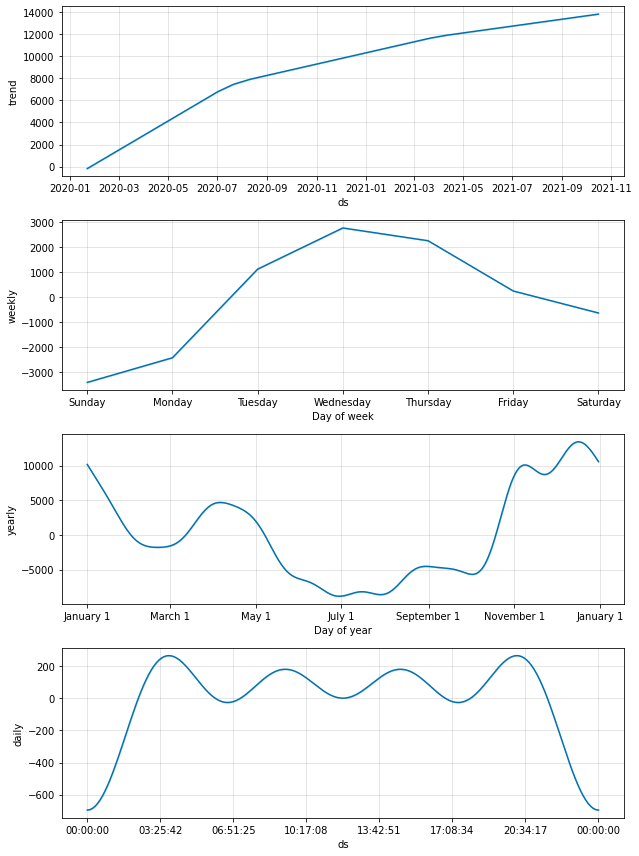

In [ ]:
make_plot(data_all_confirmed_daily, 'Germany')

### 특이점 - Germany
1. 전체적인 트렌드, 경향성은 계속해서 증가하고 있다. 주춤하는 구간이 없이 게속해서 증가하고 있다.
2. 트렌드를 제거했을 때, 주중에 확진자수는 수요일에 제일 많은 것으로 보인다.
3. 트렌드를 제거했을 때, 연간 특성은 확진자수가 7, 8월이 가장 적고, 12월에 가장 많은 것을 볼 수 있다.

### Italy (이탈리아)

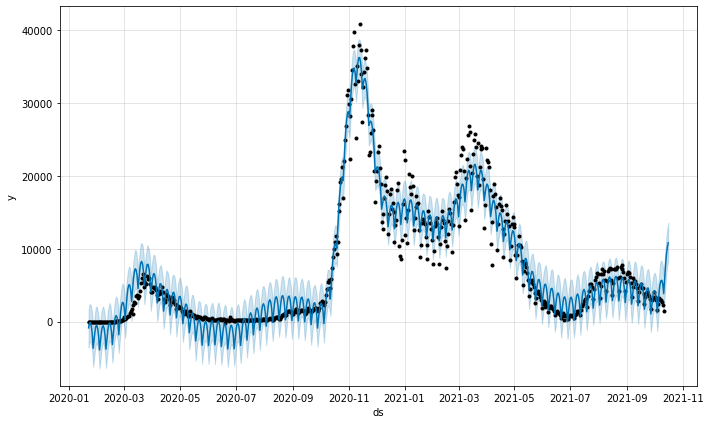

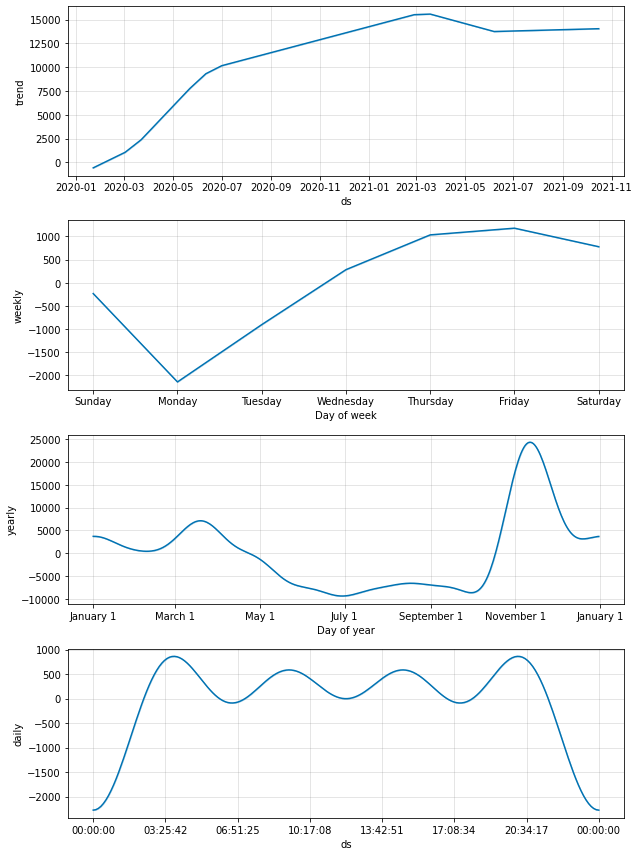

In [ ]:
make_plot(data_all_confirmed_daily, 'Italy')

### 특이점 - Italy
1. 전체적인 트렌드는 일일 확진자수가 계속해서 증가하다가 올해 3월에 최고점을 찍었고, 조금 내려오긴 했으나 계속해서 발생하고 있다.
2. 트렌드를 제거했을 때, 주중에 확진자수는 금요일에 제일 많은 것으로 보인다.
3. 트렌드를 제거했을 때, 연간 특성은 확진자수가 8월부터 10월까지가 적고, 12월에 가장 많은 것을 알 수 있다.

### United Kingdom (영국)

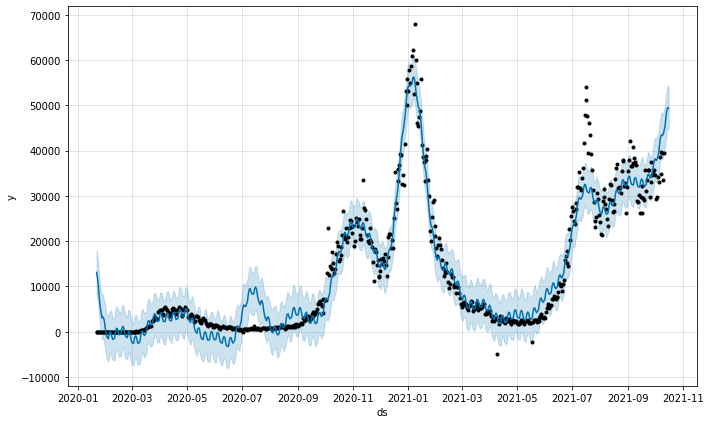

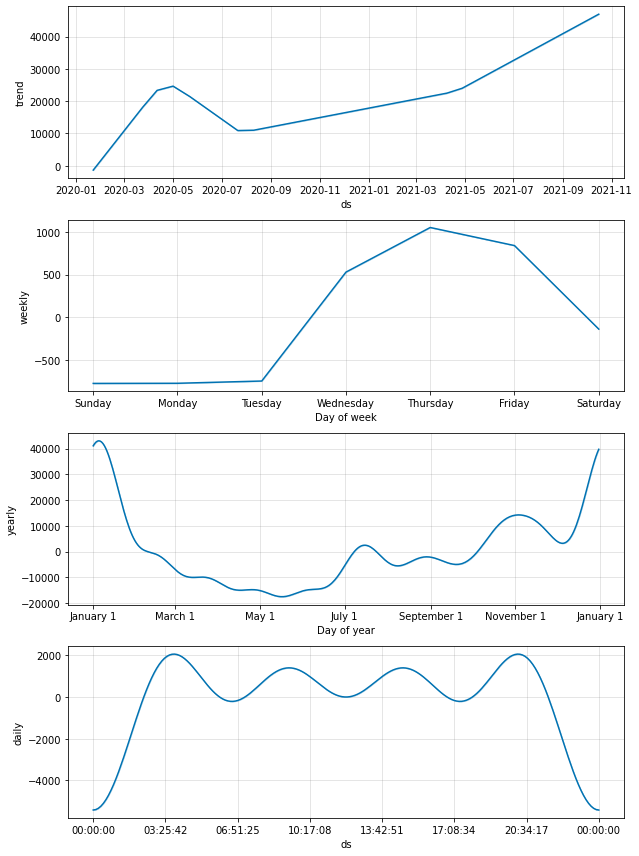

In [ ]:
make_plot(data_all_confirmed_daily, 'United Kingdom')

### 특이점 - United Kingdom
1. 전체적인 트렌드 :  작년 5월경에 일시적으로 높았던 일일 확진자수가 다시 낮아졌다가 8월을 기점으로 계속해서 증가하고 있다. 최근의 증가율이 높은 편이다.
2. 트렌드를 제거했을 때, 주중에 확진자수는 전체 데이터와 마찬가지로, 목요일에 가장 많은 것으로 보인다.
3. 트렌드를 제거했을 때, 연간 특성은 확진자수가 5월 경에 가장 적고, 1월경에 가장 많은 것으로 보인다.

# 6) 우리나라는 잘하고 있는가?

## 일일 확진자 발생 현황 재분석

### 우리나라만 분석 시

- 올해 6월 이전까지는, 3차례의 대유행을 제외하면 굉장히 잘 선방하고 있었다.
- 올해 7월을 기점으로 연일 최고치를 경신하면서 **일일 확진자수가 계속해서 급증** 했었다.
- 최근에는 잠잠해지는 듯 하나, 6월 이전에 비하면 높은 편이기에 계속해서 주의를 기울여야한다고 생각된다.

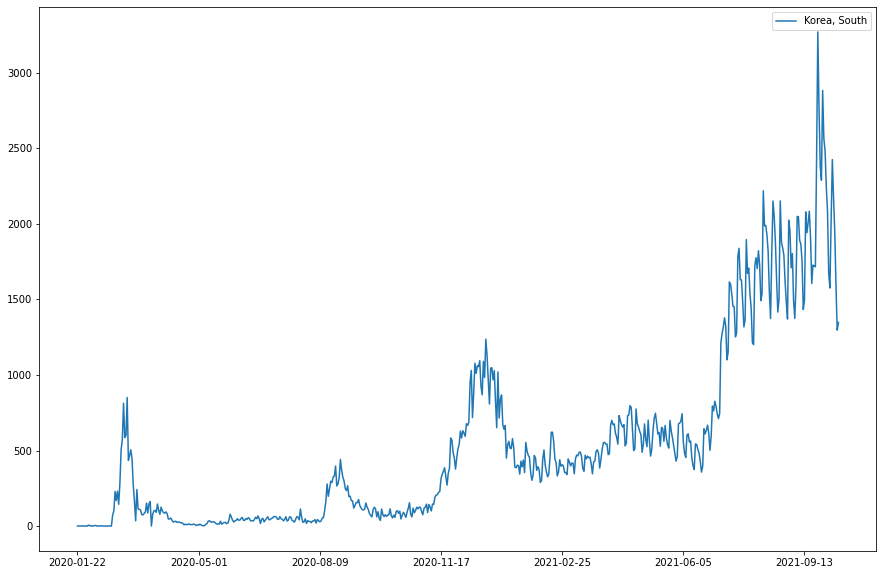

In [ ]:
plt.figure(figsize=(15, 10))
data_all_confirmed_daily['Korea, South'].plot()
plt.legend()
plt.show()

### 타 4개국과 분석 시 
- 타 4개국(아르헨티나, 독일, 이탈리아, 영국)과 비교했을 때, 우리나라의 일일 확진자 발생 수는 굉장히 작은 것을 볼 수 있다. 

- 특히나 일일 확진자수 최고치를 살펴보면, 타 4개국은 max value가 40000명 이상이고, 평균이 모두 6800명 이상인데에 비해, 한국은 max가 3270명으로 10배 이상 차이나며, 평균또한 531명으로 12배 이상 차이난다.

- 이것은 인구수 대비 비율로 살펴보아도 마찬가지이며, 평균은 최소 8배, 최댓값은 9배 이상 차이난다.

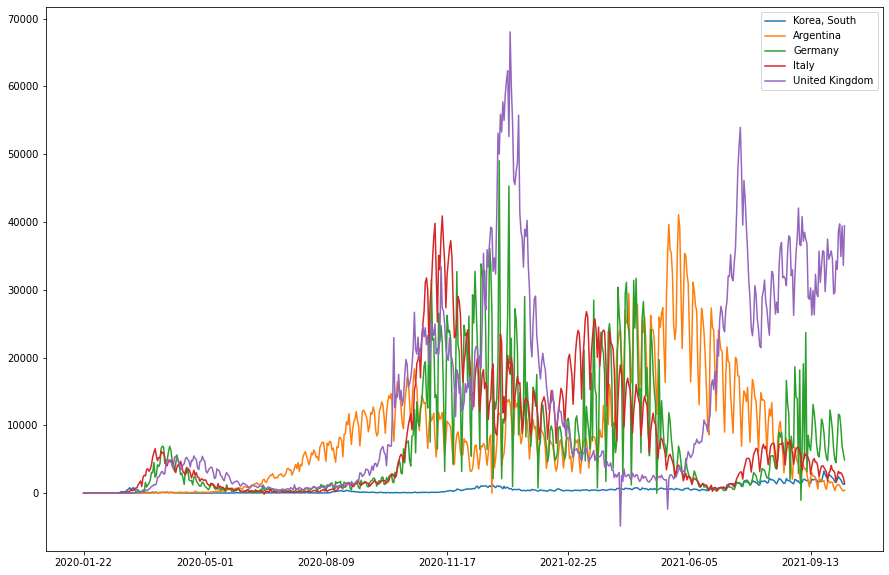

In [ ]:
plt.figure(figsize=(15, 10))
data_all_confirmed_daily['Korea, South'].plot()
data_all_confirmed_daily['Argentina'].plot()
data_all_confirmed_daily['Germany'].plot()
data_all_confirmed_daily['Italy'].plot()
data_all_confirmed_daily['United Kingdom'].plot()
plt.legend()
plt.show()

In [ ]:
data_all_confirmed_daily.describe()

,"Korea, South",Argentina,Germany,Italy,United Kingdom,All
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,531.260731,8372.456280,6873.364070,7475.090620,13026.659777,72557.662957
std,609.191703,8229.043309,8451.333434,8730.956986,14732.246246,56777.786131
min,0.000000,0.000000,-1050.000000,-148.000000,-4860.000000,0.000000
25%,61.000000,1284.000000,742.000000,876.000000,1504.000000,16198.000000
50%,372.000000,6899.000000,2993.000000,3737.000000,5179.000000,76876.000000
75%,671.000000,12027.000000,10078.000000,12755.000000,23228.000000,111204.000000
max,3270.000000,41080.000000,49044.000000,40902.000000,68053.000000,261748.000000


In [ ]:
data_confirmed_daily_pop = pd.concat(
    daily_increase(data_confirmed_pop), axis=1)
data_confirmed_daily_pop.columns = date_list
data_confirmed_daily_pop = data_confirmed_daily_pop.T
data_confirmed_daily_pop.describe()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
count,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.001029,0.018336,0.008204,0.012363,0.019189
std,0.001180,0.018022,0.010087,0.014440,0.021701
min,0.000000,0.000000,-0.001253,-0.000245,-0.007159
25%,0.000118,0.002812,0.000886,0.001449,0.002215
50%,0.000721,0.015109,0.003572,0.006181,0.007629
75%,0.001300,0.026339,0.012029,0.021096,0.034216
max,0.006336,0.089966,0.058536,0.067649,0.100246


## 백신 접종률 및 일일 사망자수 분석

- 데이터 출처 : https://ourworldindata.org/covid-vaccinations

In [ ]:
vacc = pd.read_csv('../data/owid-covid-data.csv', encoding='utf-8')

In [ ]:
vacc.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
vacc_Korea = vacc[vacc['location'] == 'South Korea'][['date', 'total_vaccinations_per_hundred',
                                                      'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']][-601:-1]
vacc_Argentina = vacc[vacc['location'] == 'Argentina'][['date', 'total_vaccinations_per_hundred',
                                                        'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']][-601:-1]
vacc_Germany = vacc[vacc['location'] == 'Germany'][['date', 'total_vaccinations_per_hundred',
                                                    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']][-601:-1]
vacc_Italy = vacc[vacc['location'] == 'Italy'][['date', 'total_vaccinations_per_hundred',
                                                'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']][-601:-1]
vacc_UK = vacc[vacc['location'] == 'United Kingdom'][['date', 'total_vaccinations_per_hundred',
                                                      'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']][-601:-1]

vacc_Korea = vacc_Korea.set_index('date')
vacc_Argentina = vacc_Argentina.set_index('date')
vacc_Germany = vacc_Germany.set_index('date')
vacc_Italy = vacc_Italy.set_index('date')
vacc_UK = vacc_UK.set_index('date')

vacc_Korea.tail()

,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
date,,,
2021-10-07,131.83,77.70,56.96
2021-10-08,134.05,77.79,59.10
2021-10-09,134.27,77.81,59.31
2021-10-10,134.31,77.82,59.34
2021-10-11,134.80,77.99,59.65


In [ ]:
data_death_daily_pop = pd.concat(daily_increase(data_death_pop), axis=1)
data_death_daily_pop.columns = date_list
data_death_daily_pop = data_death_daily_pop.T
data_death_daily_pop.describe()

Country/Region,"Korea, South",Argentina,Germany,Italy,United Kingdom
count,629.000000,629.000000,629.000000,629.000000,629.000000
mean,0.000008,0.000402,0.000179,0.000345,0.000323
std,0.000010,0.000472,0.000286,0.000384,0.000481
min,0.000000,0.000000,-0.000104,-0.000051,0.000000
25%,0.000002,0.000055,0.000010,0.000033,0.000021
50%,0.000004,0.000302,0.000053,0.000124,0.000099
75%,0.000010,0.000591,0.000239,0.000609,0.000405
max,0.000078,0.007339,0.002070,0.001642,0.002681


### 국가별 백신 접종률 변화 추이

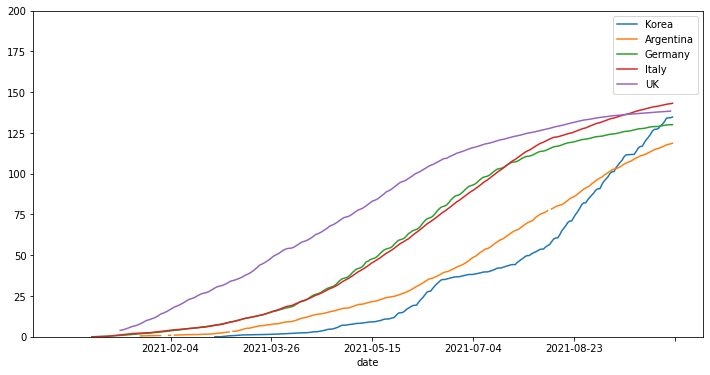

In [ ]:
plt.figure(figsize=(12, 6))
vacc_Korea['total_vaccinations_per_hundred'].plot()
vacc_Argentina['total_vaccinations_per_hundred'].plot()
vacc_Germany['total_vaccinations_per_hundred'].plot()
vacc_Italy['total_vaccinations_per_hundred'].plot()
vacc_UK['total_vaccinations_per_hundred'].plot()
plt.ylim((0, 200))
plt.legend(['Korea', 'Argentina', 'Germany', 'Italy', 'UK'])
plt.show()

타 국가들에 비해, 늦게 접종을 시작했지만, 빠른 속도로 따라 잡아 현재는 오히려 아르헨티나와 독일을 앞서고 있다!

### 국가별 백신 접종률 및 사망률 비교

- 비교를 위해서 일일 인구수대비 사망자수에 십만을 곱해 스케일링을 했다.

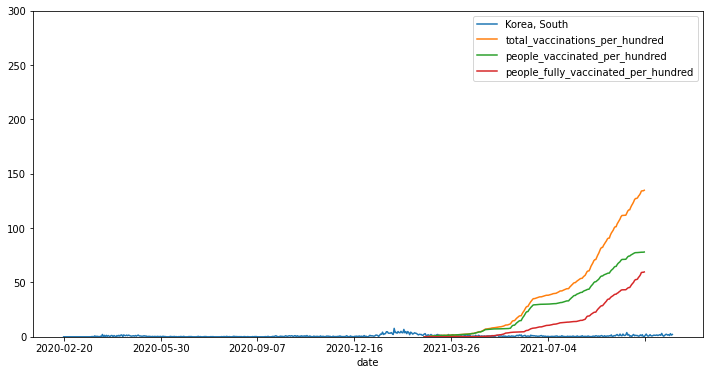

In [ ]:
plt.figure(figsize=(12, 6))
(data_death_daily_pop['Korea, South']*100000).plot()
vacc_Korea['total_vaccinations_per_hundred'].plot()
vacc_Korea['people_vaccinated_per_hundred'].plot()
vacc_Korea['people_fully_vaccinated_per_hundred'].plot()
plt.ylim((0, 300))
plt.legend()
plt.show()

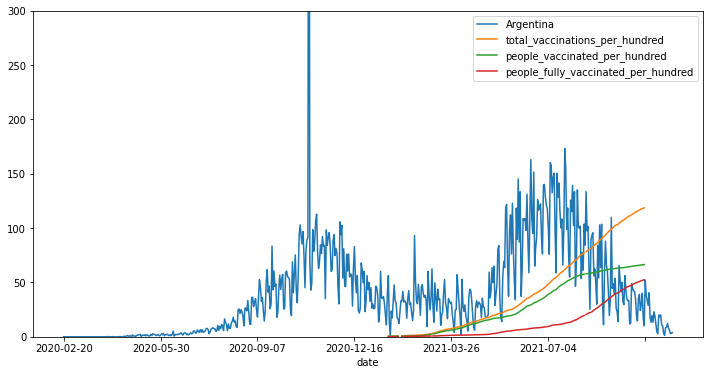

In [ ]:
plt.figure(figsize=(12, 6))
(data_death_daily_pop['Argentina']*100000).plot()
vacc_Argentina['total_vaccinations_per_hundred'].plot()
vacc_Argentina['people_vaccinated_per_hundred'].plot()
vacc_Argentina['people_fully_vaccinated_per_hundred'].plot()
plt.ylim((0, 300))
plt.legend()
plt.show()

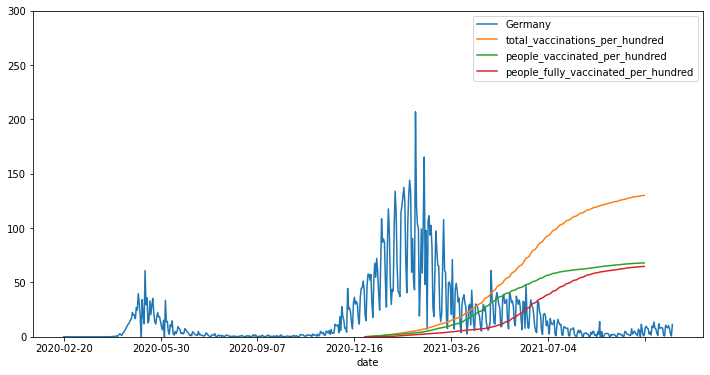

In [ ]:
plt.figure(figsize=(12, 6))
(data_death_daily_pop['Germany']*100000).plot()
vacc_Germany['total_vaccinations_per_hundred'].plot()
vacc_Germany['people_vaccinated_per_hundred'].plot()
vacc_Germany['people_fully_vaccinated_per_hundred'].plot()
plt.ylim((0, 300))
plt.legend()
plt.show()

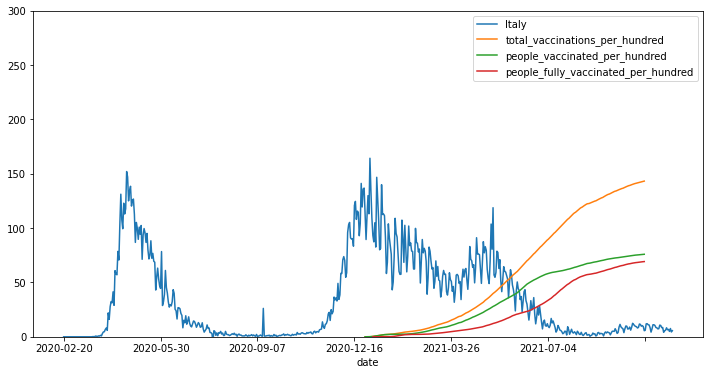

In [ ]:
plt.figure(figsize=(12, 6))
(data_death_daily_pop['Italy']*100000).plot()
vacc_Italy['total_vaccinations_per_hundred'].plot()
vacc_Italy['people_vaccinated_per_hundred'].plot()
vacc_Italy['people_fully_vaccinated_per_hundred'].plot()
plt.ylim((0, 300))
plt.legend()
plt.show()

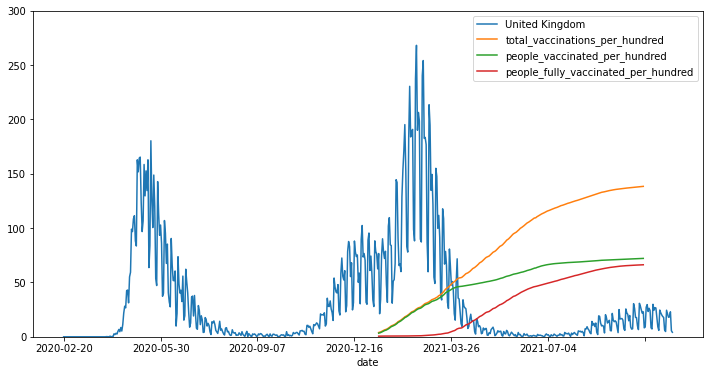

In [ ]:
plt.figure(figsize=(12, 6))
(data_death_daily_pop['United Kingdom']*100000).plot()
vacc_UK['total_vaccinations_per_hundred'].plot()
vacc_UK['people_vaccinated_per_hundred'].plot()
vacc_UK['people_fully_vaccinated_per_hundred'].plot()
plt.ylim((0, 300))
plt.legend()
plt.show()

### 분석 결과
- 접종률 추이 : 타 국가들보다 늦게 접종이 시작되었지만, 현재는 빠른 속도로 따라잡아 오히려 아르헨티나와 독일보다 접종률이 높은 것으로 보인다.

- 사망률과 접종률 (우리나라) : 올해 초에, 기존보다 사망률이 높은 순간이 있었으나, 백신 접종 시작 이후로는 사망률이 계속해서 낮은 모습을 보이고 있다. 뿐만 아니라, 사망자 수 자체가 타 국가들에 비해서 월등히 낮은 모습을 보이고 있다.

- 사망률과 접종률 (공통) : 모든 국가들에서 백신접종이 시작된 이후로 사망률이 매우 감소하는 모습을 보이고 있다. 아르헨티나는 그 효과가 미비한 듯 싶었으나 최근에는 사망률이 감소하는 모습을 보이고 있다.

# 7) 의료 수준의 수치화

위의 Vaccine 데이터의 컬럼 중에서, 'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index' 등의 
의료 수준을 나타낼만한, (손씻기 시설, 병동 침대 갯수, 기대 수명, 인간개발지수)를 볼 수 있었다. 

이를 통해서 각 국가별 누적 사망자 수, 누적 확진자 수와의 상관관계가 있을지, 살펴보도록 하자.

## 의료수준 데이터 전처리

In [ ]:
vacc[vacc['location'] == 'South Korea'][['date', 'handwashing_facilities',
                                         'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index']]

,date,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
102899,2020-01-21,NaN,12.27,83.03,0.916
102900,2020-01-22,NaN,12.27,83.03,0.916
102901,2020-01-23,NaN,12.27,83.03,0.916
102902,2020-01-24,NaN,12.27,83.03,0.916
102903,2020-01-25,NaN,12.27,83.03,0.916
...,...,...,...,...,...
103525,2021-10-08,NaN,12.27,83.03,0.916
103526,2021-10-09,NaN,12.27,83.03,0.916
103527,2021-10-10,NaN,12.27,83.03,0.916
103528,2021-10-11,NaN,12.27,83.03,0.916


In [ ]:
# 손씻기 시설 데이터는 NaN값임을 알 수있다. 제외하고 진행하도록 하자

In [ ]:
medical = pd.concat([
    vacc[vacc['location'] == 'South Korea'][['hospital_beds_per_thousand',
                                             'life_expectancy', 'human_development_index']].iloc[-100],
    vacc[vacc['location'] == 'Argentina'][['hospital_beds_per_thousand',
                                           'life_expectancy', 'human_development_index']].iloc[-100],
    vacc[vacc['location'] == 'Germany'][['hospital_beds_per_thousand',
                                         'life_expectancy', 'human_development_index']].iloc[-100],
    vacc[vacc['location'] == 'Italy'][['hospital_beds_per_thousand',
                                       'life_expectancy', 'human_development_index']].iloc[-100],
    vacc[vacc['location'] == 'United Kingdom'][['hospital_beds_per_thousand',
                                                'life_expectancy', 'human_development_index']].iloc[-100],
], axis=1)
medical.columns = ['Korea', 'Argentina', 'Germany', 'Italy', 'UK']
medical = medical.T

In [ ]:
medical

,hospital_beds_per_thousand,life_expectancy,human_development_index
Korea,12.27,83.03,0.916
Argentina,5.00,76.67,0.845
Germany,8.00,81.33,0.947
Italy,3.18,83.51,0.892
UK,2.54,81.32,0.932


In [ ]:
# 인구수 대비 누적 확진자수와 사망자수 또한 생성한다.

In [ ]:
latest_confirmed = pd.DataFrame(data_confirmed_pop.iloc[-1])
latest_confirmed.columns = ['latest_confirmed']
latest_confirmed.index = medical.index
latest_confirmed

,latest_confirmed
Korea,0.647460
Argentina,11.533184
Germany,5.160113
Italy,7.776530
UK,12.069893


In [ ]:
latest_death = pd.DataFrame(data_death_pop.iloc[-1])
latest_death.columns = ['latest_death']
latest_death.index = medical.index
latest_death

,latest_death
Korea,0.005026
Argentina,0.252926
Germany,0.112561
Italy,0.217220
UK,0.202933


## 상관계수 분석

In [ ]:
SUM = pd.concat([medical, latest_confirmed, latest_death], axis=1)
SUM

,hospital_beds_per_thousand,life_expectancy,human_development_index,latest_confirmed,latest_death
Korea,12.27,83.03,0.916,0.647460,0.005026
Argentina,5.00,76.67,0.845,11.533184,0.252926
Germany,8.00,81.33,0.947,5.160113,0.112561
Italy,3.18,83.51,0.892,7.776530,0.217220
UK,2.54,81.32,0.932,12.069893,0.202933


In [ ]:
SUM.corr()

,hospital_beds_per_thousand,life_expectancy,human_development_index,latest_confirmed,latest_death
hospital_beds_per_thousand,1.000000,0.216382,0.242343,-0.900237,-0.916897
life_expectancy,0.216382,1.000000,0.627371,-0.584801,-0.530481
human_development_index,0.242343,0.627371,1.000000,-0.390843,-0.553914
latest_confirmed,-0.900237,-0.584801,-0.390843,1.000000,0.929008
latest_death,-0.916897,-0.530481,-0.553914,0.929008,1.000000


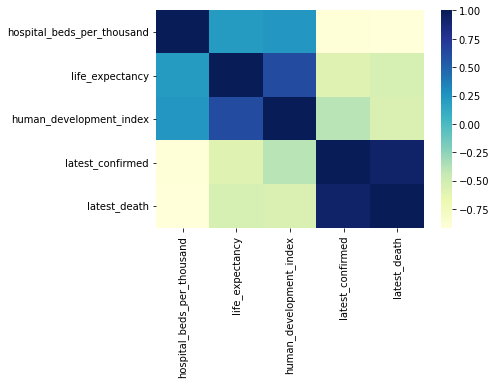

In [ ]:
sns.heatmap(SUM.corr(), cmap="YlGnBu")

### 분석 결과
누적 확진자 수 및 사망자수와 가장 상관계수의 절댓값이 높았던 것은
'병상의 갯수'로, 각각 -0.90, -0.92로 굉장히 높은 값을 보이고 있고,
그다음으로는 기대수명과 인간개발지수가 순서대로 높은 절댓값을 보였다.

의료수준을 대표한다고 볼 수 있는 병상의개수와 기대수명 그리고 인간개발지수가 Corona-Virus의 확진자와 사망자수와 큰 연관이 있음을 알아낼 수 있다.

## OLS를 이용한 누적 사망자수 선형회귀분석

In [ ]:
dfX0 = medical
dfX0 = dfX0.reset_index(drop=True)
dfX = sm.add_constant(dfX0)
dfy = latest_death
dfy = dfy.reset_index(drop=True)
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           latest_death   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     22.56
Date:                Wed, 13 Oct 2021   Prob (F-statistic):              0.153
Time:                        11:12:52   Log-Likelihood:                 15.550
No. Observations:                   5   AIC:                            -23.10
Df Residuals:                       1   BIC:                            -24.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



### 분석 결과
5개의 나라만 비교했기에, 그 정확도가 높지는 않지만 위에서 보았던 상관계수 분석결과와 비슷하게,

모든 지표의 coef가 음수임을 볼 수 있다.
특히나 병상갯수의 coef는 표준편차도 낮으며 p-value도 낮은 것을 볼 수 있었다.

이 것을 해석한다면, 의료수준이 높아질수록, 확진자수가 낮아진다는 뜻이라고 볼 수 있다. 

똑같은 말이지만, 의료수준이 낮아질수록, 확진자수가 높아진다는 뜻이다.

# 8) 결론

- 한국, 그리고 한국과 비슷한 인구수를 가지고 있는 G20국가 중 아르헨티나, 독일, 이탈리아, 영국을 선택해서 한국의 COVID-19 대응능력을 살펴보았다.

- 누적-일일 확진자수 / 사망자수 4가지 모든 측면에서 한국이 압도적으로 낮았으며, 인구수대비 비율로 확인해도 최소 8~9배 차이나는 모습을 보여주었다.

- 트렌드를 분석해보았을 때, 아르헨티나를 제외한 나머지 나라에서는 12월~1월 사이에 확진자가 많은 것을 볼 수 있었으며, 확진자수의 지속적인 증가 추세 정도만 공통적인 경향성으로 알아낼 수 있었다.

- 또한, 백신접종률 데이터를 통해서, 공통적으로 접종이 시작된 이후에 사망률이 감소하는 모습을 보였음을 알 수 있고

- 의료 수준을 알려주는 3가지 지표를 통해서, 의료수준이 코로나 확진자 및 사망자. 특히나 사망률과 더욱 크게 연관이 있음을 알 수 있었다.

